In [ ]:
!pip install gymnasium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing All the necessary Libraries

In [ ]:
#Importing libraries required for the assignment
import gym
from gym import spaces
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# **PART-I: Defining RL Environment**

## **Step-1 and Step-2: Deining the Environment (states, rewards) and the actions of the Agent**

**Theme**: Grid world environment with a mouse, cheese, home, and obstacles.

**States**: The environment is a 5x5 grid where the mouse, cheese, home, and obstacles are located.

**Actions**: The mouse can move in four directions: up, down, left, and right.

**Rewards**: The mouse receives a negative reward if it steps on a shock obstacle and a positive reward if it steps on a cheese square.

**Objective**: The mouse’s objective is to reach the home located at the bottom right corner of the grid while avoiding the shocks and collecting the cheese pieces to maximize its total reward. The episode terminates after a fixed maximum number of time steps.

In [ ]:
class GridEnvironment(gym.Env):
    def __init__(self):
        self.environment_width = 5   # environment width and height
        self.environment_height = 5
        self.num_actions = 4   # total number of actions taken by agent (mouse)
        self.observation_space = spaces.Discrete(self.environment_width * self.environment_height)    # creating the space
        self.action_space = spaces.Discrete(self.num_actions)  # creating the action space
        self.max_timesteps = 100   # maximum number of steps possible
        self.mouse_pos = [0, 0]   # location of the agent (mouse) in the environment
        self.home_pos = [4, 4]   # location of the goal (home) of the environment
        self.shock_pos = [[0, 4], [2, 1], [4, 2]]    # location of the shock positions (negative rewards)
        self.cheese_pos = [[0, 2], [2, 4], [4, 0]]   # location of the cheese positions (positive rewards)
        self.rewards = {}
        self.actions = {0:'Right',1:'Left',2:'Up',3:'Down'}   # dictionary of the actions
        self.timestep = 0

        # assigning positive rewards
        self.rewards[tuple([0,2])] = 3 
        self.rewards[tuple([2,4])] = 4
        self.rewards[tuple([4,0])] = 5

        #assigning negative rewards
        self.rewards[tuple([2,1])] = -5
        self.rewards[tuple([0,4])] = -4
        self.rewards[tuple([4,2])] = -3
        
        # reward for reaching home
        self.rewards[tuple([4,4])] = 10
        self.original_rewards = self.rewards.copy()

    def reset(self):    # reset function which resets the mouse position to [0,0], time steps to 0 and rewards would be initialized to the original vlaues
        self.mouse_pos = [0, 0]
        self.timestep = 0
        self.rewards = self.original_rewards.copy()
        return self.get_observation()

    def step(self, action):    # step function which defines the actions of the agent inside the grid enviroment
        assert self.action_space.contains(action)
        self.timestep += 1

        if action == 0:  # move right
            self.mouse_pos[1] = min(self.mouse_pos[1] + 1, 4)
        elif action == 1:  # move left
            self.mouse_pos[1] = max(self.mouse_pos[1] - 1, 0)
        elif action == 2:  # move up
            self.mouse_pos[0] = max(self.mouse_pos[0] - 1, 0)
        elif action == 3:  # move down
            self.mouse_pos[0] = min(self.mouse_pos[0] + 1, 4)

        reward = self.rewards.get(tuple(self.mouse_pos), 0)
        self.rewards.pop(tuple(self.mouse_pos), None)   # the reward would disappear once if the mouse picks up the reward for the current episode. In the next episode again the rewards would appear because we do reset the environment and agent for every episode
        status = (self.mouse_pos == self.home_pos) or (self.timestep >= self.max_timesteps)    # finding the status of the mouse, i.e. whether it reaches the home or not 
        return self.get_observation(), reward, status 


    def render(self):    # render the environment. defining colors of the mouse, cheese, shock and home blocks
        img = np.zeros((5, 5, 3), dtype=np.uint8)
        img[self.mouse_pos[0], self.mouse_pos[1]] = [192,192,192] 
        img[self.home_pos[0], self.home_pos[1]] = [0, 128, 0]
        
        for i in self.shock_pos:
          img[i[0],i[1]] = [220,20,60]
        
        for i in self.cheese_pos:
          img[i[0],i[1]] = [255,228,181]
        return img

    def get_observation(self):   # 2d matrix to 1d state representaion
        return self.mouse_pos[0] * 5 + self.mouse_pos[1]

## **Step 3: Running Random Agent for 10 steps**

Step: 1
Current state: (0, 0) , Chosen action from previous state: Left , Reward: 0 , Reached Home: False
-----------------------------------------------------


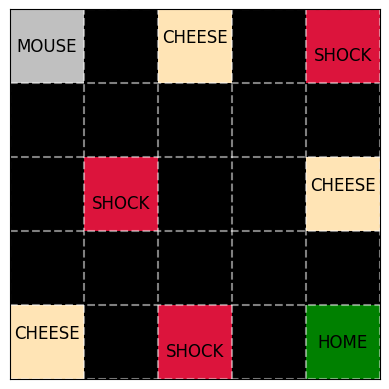

Step: 2
Current state: (0, 0) , Chosen action from previous state: Left , Reward: 0 , Reached Home: False
-----------------------------------------------------


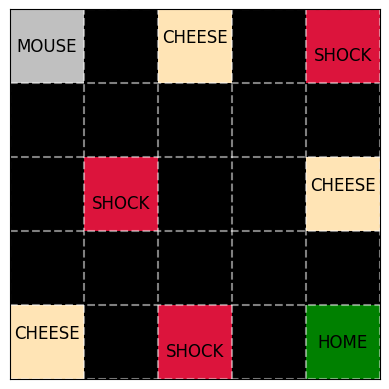

Step: 3
Current state: (0, 1) , Chosen action from previous state: Right , Reward: 0 , Reached Home: False
-----------------------------------------------------


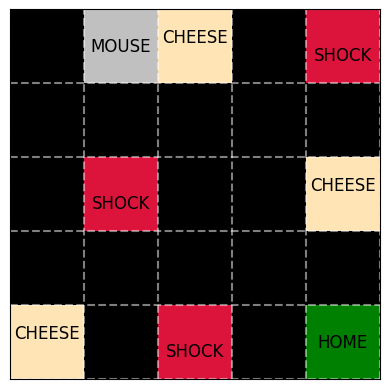

Step: 4
Current state: (0, 0) , Chosen action from previous state: Left , Reward: 0 , Reached Home: False
-----------------------------------------------------


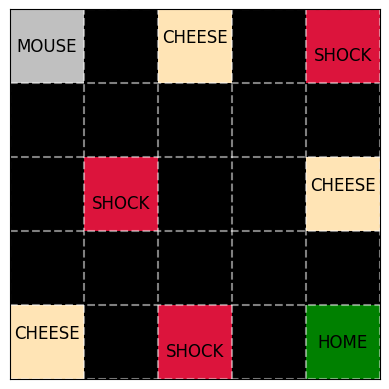

Step: 5
Current state: (0, 0) , Chosen action from previous state: Up , Reward: 0 , Reached Home: False
-----------------------------------------------------


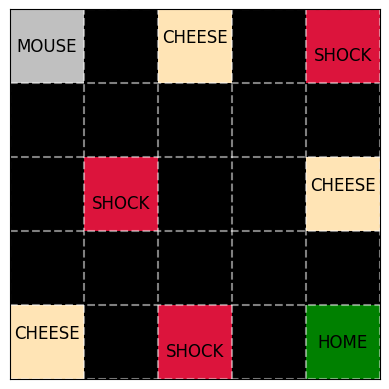

Step: 6
Current state: (0, 1) , Chosen action from previous state: Right , Reward: 0 , Reached Home: False
-----------------------------------------------------


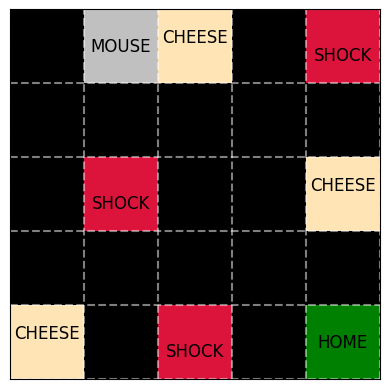

Step: 7
Current state: (0, 1) , Chosen action from previous state: Up , Reward: 0 , Reached Home: False
-----------------------------------------------------


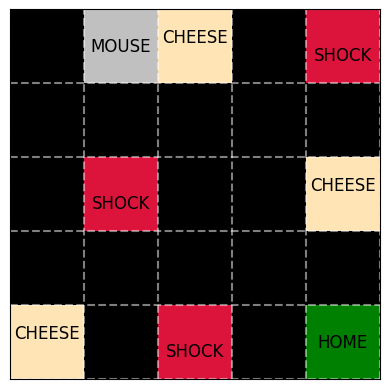

Step: 8
Current state: (0, 1) , Chosen action from previous state: Up , Reward: 0 , Reached Home: False
-----------------------------------------------------


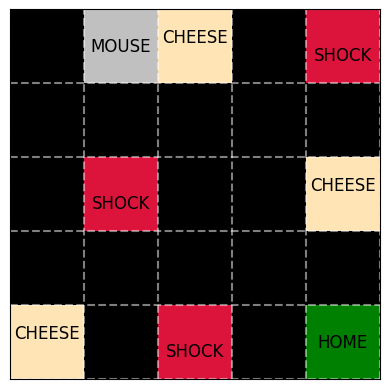

Step: 9
Current state: (0, 1) , Chosen action from previous state: Up , Reward: 0 , Reached Home: False
-----------------------------------------------------


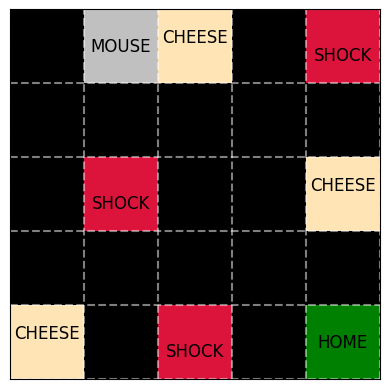

Step: 10
Current state: (0, 1) , Chosen action from previous state: Up , Reward: 0 , Reached Home: False
-----------------------------------------------------


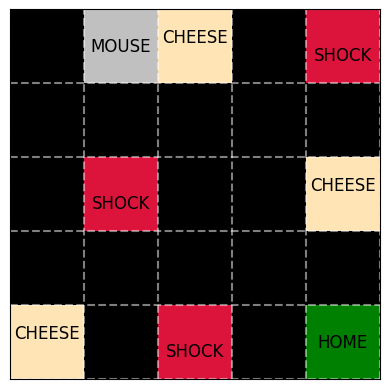

In [ ]:
env = GridEnvironment()    # creating environment object
ACTIONS = env.actions   
for i in range(10):   # iterating for 10 steps
    action = env.action_space.sample()
    obs, reward, status = env.step(action)
    print("Step:", i+1,)
    print("Current state:", tuple(env.mouse_pos), ", Chosen action from previous state:", ACTIONS[action], ", Reward:", reward, ", Reached Home:", status)
    print("-----------------------------------------------------")
    # render the environment
    rgb_array = env.render()

    fig, ax = plt.subplots()
    ax.imshow(rgb_array)


    # set left padding to 0.2 to shift the plot to the left
    ax.set_xticks(np.arange(-0.5, 5.5, 1))
    ax.set_yticks(np.arange(-0.5, 5.5, 1))
    # ax.xaxis.tick_top()
    ax.grid(True, color='white', linewidth=1.5, linestyle='--', alpha=0.5)

    # Hide xticks and yticks
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    
    # for plotting text in the corresponsing blocks, i.e., home, mouse, cheese or shock based on their location
    plt.text(env.home_pos[1], env.home_pos[0], "HOME", 
             horizontalalignment='center', verticalalignment='center',
             color='black', fontsize=12)
    
    plt.text(env.mouse_pos[1], env.mouse_pos[0], "MOUSE", 
             horizontalalignment='center', verticalalignment='center',
             color='black', fontsize=12)
    
    for i in env.shock_pos:
      plt.text(i[1], i[0], "SHOCK", 
             horizontalalignment='center', verticalalignment='top',
             color='black', fontsize=12)
      
    for i in env.cheese_pos:
      plt.text(i[1], i[0], "CHEESE", 
             horizontalalignment='center', verticalalignment='bottom',
             color='black', fontsize=12)
    
    plt.show()


# **PART-II: Solve Environment using SARSA**

## **Step 1: Applying SARSA algorithm to solve the Environment defined in Part-I**

In [ ]:
# finding the action space size, state space size and maximum number of steps from the environment
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
total_steps = env.max_timesteps

In [ ]:
# defining hyperparameter values
num_episodes = 1000  # total number of episodes
alpha = 0.2  # learning rate
gamma = 0.95  # discount factor
epsilon = 1  # initializing epsilon value (exploration-exploitation trade-off)
maximum_epsilon = 1   # maximum value of the epsilon
minimum_epsilon = 0.01  # minimum value of the epsilon
epsilon_decay_rate = (minimum_epsilon/maximum_epsilon) ** (1/num_episodes)    # calculation of epsilon decay rate
# Q- table
Q = np.zeros((state_space_size, action_space_size))   # initialization of Q matrix to zeros
SARSA_REWARDS = []
EPS=[]
TIMESTEPS = []
for episode in range(num_episodes):   # iterating over total number of episodes
    state = env.reset()   # reset the environment
    step = 0
    status = False
    total_rewards = 0
    
    # initial action 
    if np.random.uniform(0,1) > epsilon:
        action = np.argmax(Q[state, :])  # Exploit
    else:
        action = env.action_space.sample()  # Explore
    c = 1

    # iterate until the agent reaches home or maximum number of steps reached
    while not status:
        new_state, reward, status = env.step(action)   # for each action, find the next state, reward and status (i.e. whether the agent reached home or not) from the environment
        if np.random.uniform(0,1) > epsilon:   
            new_action = np.argmax(Q[new_state, :])  # Exploit
        else:
            new_action = env.action_space.sample()  # Explore
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[new_state, new_action] - Q[state, action])  # SARSA Q value update expression
        total_rewards += reward 
        state, action = new_state, new_action
        c+=1

    epsilon = epsilon * epsilon_decay_rate    # updating the epsilon value- multiplication of previous epsilon value with epsilon decay value
    SARSA_REWARDS.append(total_rewards)
    EPS.append(epsilon)
    TIMESTEPS.append(c)
print("SARSA Total Rewards: ",sum(SARSA_REWARDS))

SARSA Total Rewards:  15805


In [ ]:
# PLOT functions
def plot_rewards(REWARDS, num_episodes, text):
    plt.figure(figsize=(12, 8))
    plt.plot(REWARDS,'ro')
    plt.xlabel('Episode', fontsize=20)
    plt.ylabel('Reward Value', fontsize=20)
    plt.title('Rewards Per Episode' + text, fontsize=24)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim(xmin=0, xmax=num_episodes)
    plt.grid()
    plt.show()

def plot_epsilon(EPS, num_episodes,text):
    plt.figure(figsize=(12, 8))
    plt.plot(EPS)
    plt.xlabel('Episode', fontsize=20)
    plt.ylabel('Epsilon Values', fontsize=20)
    plt.title('Epsilon Decay' + text, fontsize=24)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    #plt.ylim(ymin=0, ymax=1)
    plt.xlim(xmin=0, xmax=num_episodes)
    plt.grid()
    plt.show()

def plot_timesteps(TIMESTEPS, num_episodes,text):
    plt.figure(figsize=(12, 8))
    plt.plot(TIMESTEPS,'bo')
    plt.xlabel('Episode', fontsize=20)
    plt.ylabel('Number of Steps', fontsize=20)
    plt.title('Time steps per Episode' + text, fontsize=24)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim(xmin=0, xmax=num_episodes)
    plt.grid()
    plt.show()

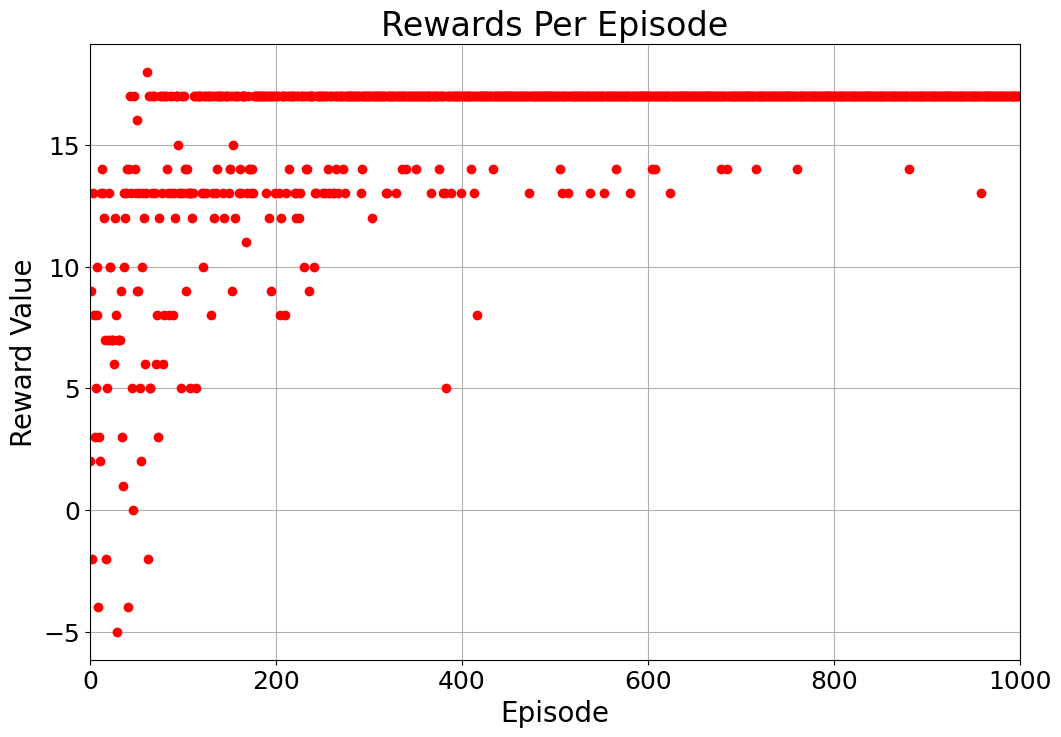

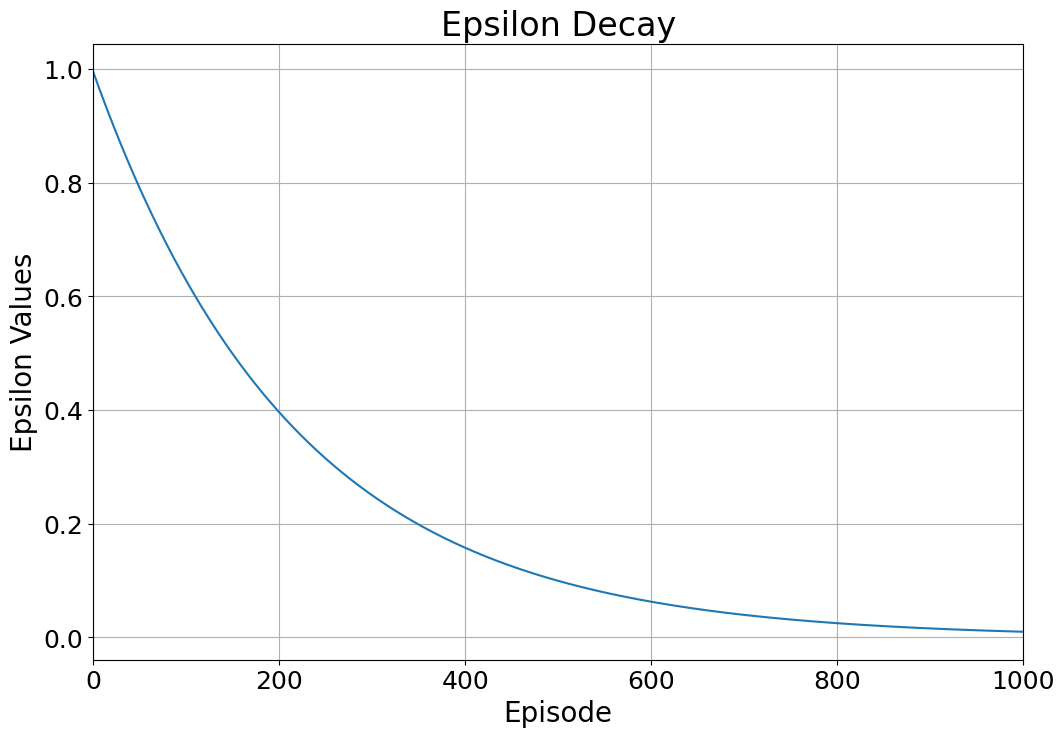

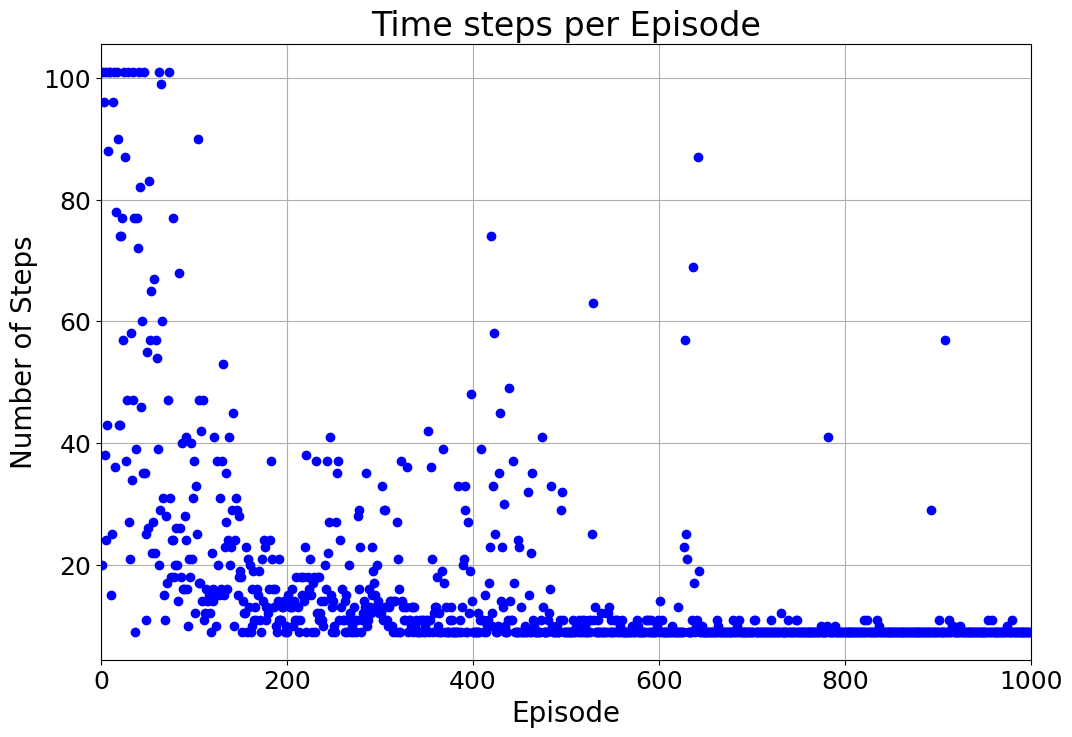

In [ ]:
plot_rewards(SARSA_REWARDS, num_episodes,'')
plot_epsilon(EPS, num_episodes, '')
plot_timesteps(TIMESTEPS, num_episodes,'')

In [ ]:
np.set_printoptions(suppress=True)
print(Q)

[[12.53577611 10.03074157  9.38712268  6.91664785]
 [13.18227325  9.40187226 10.20898252  8.98606243]
 [ 9.3844912  10.08737431  8.62943965 11.03606187]
 [ 2.89768887  5.32536564  4.2912758  11.02273228]
 [ 3.09662866  1.51496215  2.95359001 10.27415531]
 [ 2.59237414  1.30204579  9.17746349  0.29608523]
 [10.71170272  3.92652093  5.09696621 -0.77429499]
 [11.69519429  7.4469414   8.58253618  8.07530529]
 [12.36270564  9.80716983  8.15140801  9.31139126]
 [ 8.49687665  8.63222303  1.09103681 13.02499999]
 [-1.04698896 -0.03256823  0.1622354   1.35267926]
 [ 7.27500187  0.05306939  1.4263357   1.46132121]
 [ 9.35341479 -1.76160462  7.02776037  3.98003614]
 [ 9.92851008  9.01419928  9.0002687   8.86744801]
 [ 9.00320752  9.17024633  9.20222117  9.5       ]
 [ 1.10350897  1.16231306  0.48971536  2.88318776]
 [ 4.72229719  0.81886333 -1.55451149  0.93613305]
 [ 8.03576624  1.05129935  4.41221638  1.81171614]
 [ 9.49615457  2.09389783  7.81558792  8.43607087]
 [ 9.46510079  8.62671265  8.78

Text(70.72222222222221, 0.5, 'States')

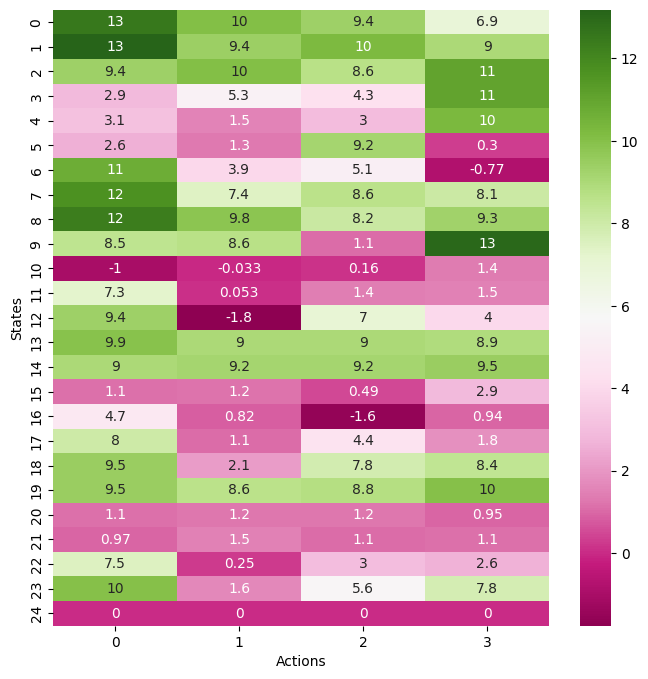

In [ ]:
plt.figure(figsize=(8, 8))
heatmap_Q = sns.heatmap(Q, annot=True, cmap='PiYG')
heatmap_Q.set_xlabel('Actions')
heatmap_Q.set_ylabel('States')

# **Evaluation of the SARSA algorithm - Plot for 10 episodes where Agenet forces to take greedy actions**

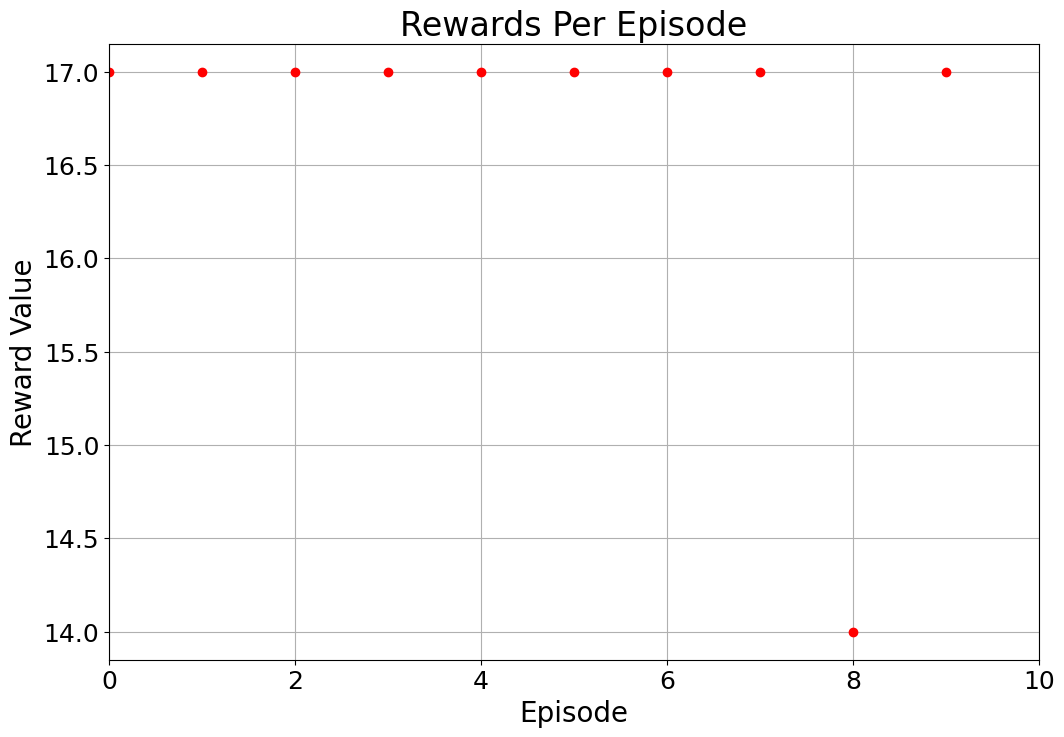

In [ ]:
# SARSA algorithm
def SARSA(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon):
    SARSA_REWARDS = []
    EPS=[]
    TIMESTEPS = []
    epsilon = minimum_epsilon
    for episode in range(num_episodes):   # iterate over total number of episodes
        state = env.reset()   # reset the environment
        step = 0
        status = False
        total_rewards = 0
        # choosing initial action
        if np.random.uniform(0,1) > epsilon:
            action = np.argmax(Q[state, :])  # Exploit (using gained knowledge about environment)
        else:
            action = env.action_space.sample()  # Explore
        c= 0
        # iterate until the agent reaches the home or maximum number of steps reached
        while not status:
            new_state, reward, status = env.step(action)
            if np.random.uniform(0,1) > epsilon:
                new_action = np.argmax(Q[new_state, :])  # Exploit
            else:
                new_action = env.action_space.sample()  # Explore
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[new_state, new_action] - Q[state, action])
            total_rewards += reward
            state, action = new_state, new_action
            c+=1
        SARSA_REWARDS.append(total_rewards)
        EPS.append(epsilon)
        TIMESTEPS.append(c)
    return SARSA_REWARDS, EPS, TIMESTEPS, Q

SARSA_REWARDS, EPS, TIMESTEPS, Q = SARSA(10, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon)
plot_rewards(SARSA_REWARDS, 10,'')


Since the agent was trained in the environment for 1000 episodes, the Q-matrix is updated and when we run the agent in the trained environment, it would take actions that would maximize the rewards. Hence, the total reward accumulated by the agent in each episode is maximum, which can be observed from the above plot.

## **Step 2: Hyper-parameter tuning**

In [ ]:
## SARSA function
def SARSA(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon):
    # Q- table
    Q = np.zeros((state_space_size, action_space_size))
    SARSA_REWARDS = []
    EPS=[]
    TIMESTEPS = []
    epsilon = maximum_epsilon
    for episode in range(num_episodes):
        state = env.reset()
        step = 0
        status = False
        total_rewards = 0
        if np.random.uniform(0,1) > epsilon:
            action = np.argmax(Q[state, :])  # Exploit (using gained knowledge about environment)
        else:
            action = env.action_space.sample()  # Explore
        c= 0
        while not status:
            new_state, reward, status = env.step(action)
            if np.random.uniform(0,1) > epsilon:
                new_action = np.argmax(Q[new_state, :])  # Exploit
            else:
                new_action = env.action_space.sample()  # Explore
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[new_state, new_action] - Q[state, action])    # SARSA algorithm Q-value update expression
            total_rewards += reward
            state, action = new_state, new_action
            c+=1
        if epsilon > minimum_epsilon:   # updating the epsilon value
          epsilon = epsilon * epsilon_decay_rate

        SARSA_REWARDS.append(total_rewards)
        EPS.append(epsilon)
        TIMESTEPS.append(c)
    return SARSA_REWARDS, EPS, TIMESTEPS, Q

## **1. Tuning Minimum value and Maximum values of Epsilon**

(i) **Maximum Epsilon = 0.9**

**Minimum Epsilon = 0.2** 

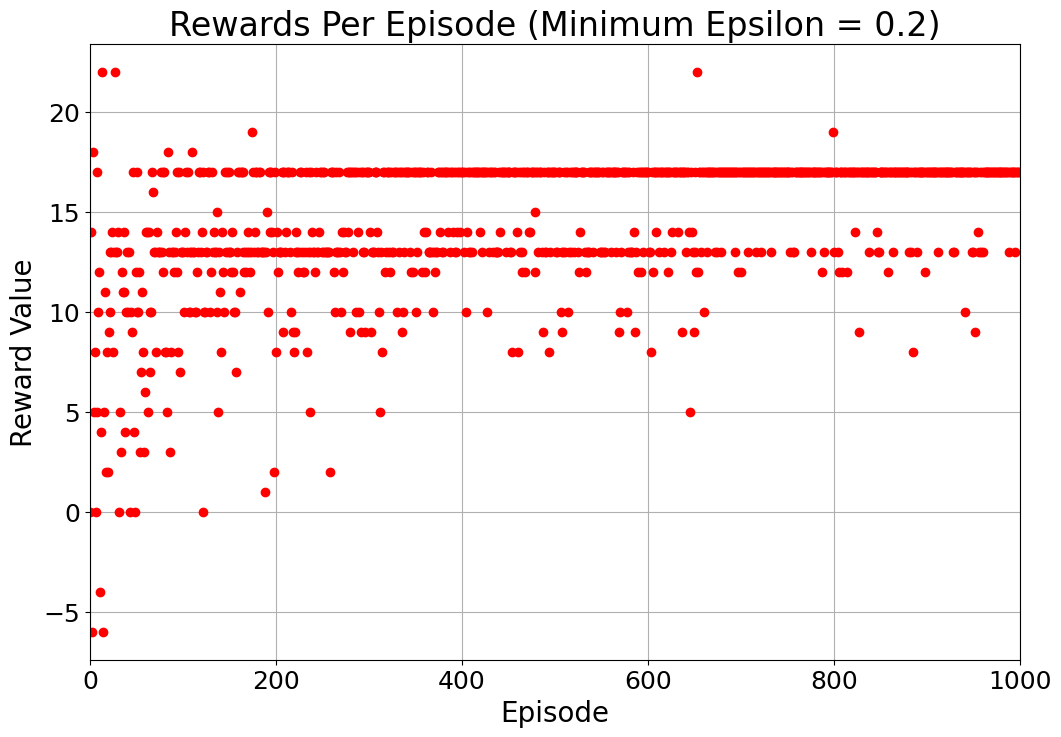

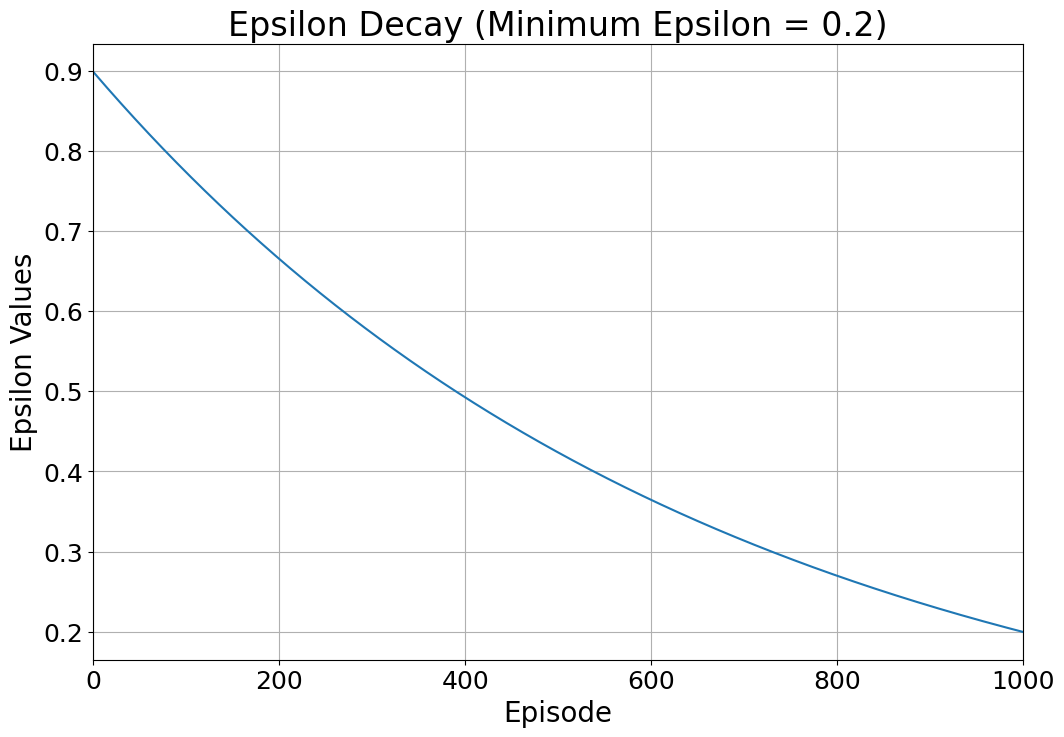

In [ ]:
# keeping all other hyperparameters constant and setting the maximum and minimum epsilon values as 0.9 and 0.2
num_episodes = 1000
alpha = 0.2
gamma = 0.95
epsilon = 1
maximum_epsilon = 0.9
minimum_epsilon = 0.2
epsilon_decay_rate = (minimum_epsilon/maximum_epsilon) ** (1/num_episodes)
SARSA_REWARDS, EPS, TIMESTEPS, Q = SARSA(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon)   # calling SARSA function 
plot_rewards(SARSA_REWARDS, num_episodes, f' (Minimum Epsilon = {minimum_epsilon})')
plot_epsilon(EPS, num_episodes, f' (Minimum Epsilon = {minimum_epsilon})')
# plot_timesteps(TIMESTEPS, num_episodes, f' (Minimum Epsilon = {minimum_epsilon})')

(ii) **Maximum Epsilon = 0.8**

**Minimum Epsilon = 0.3** 

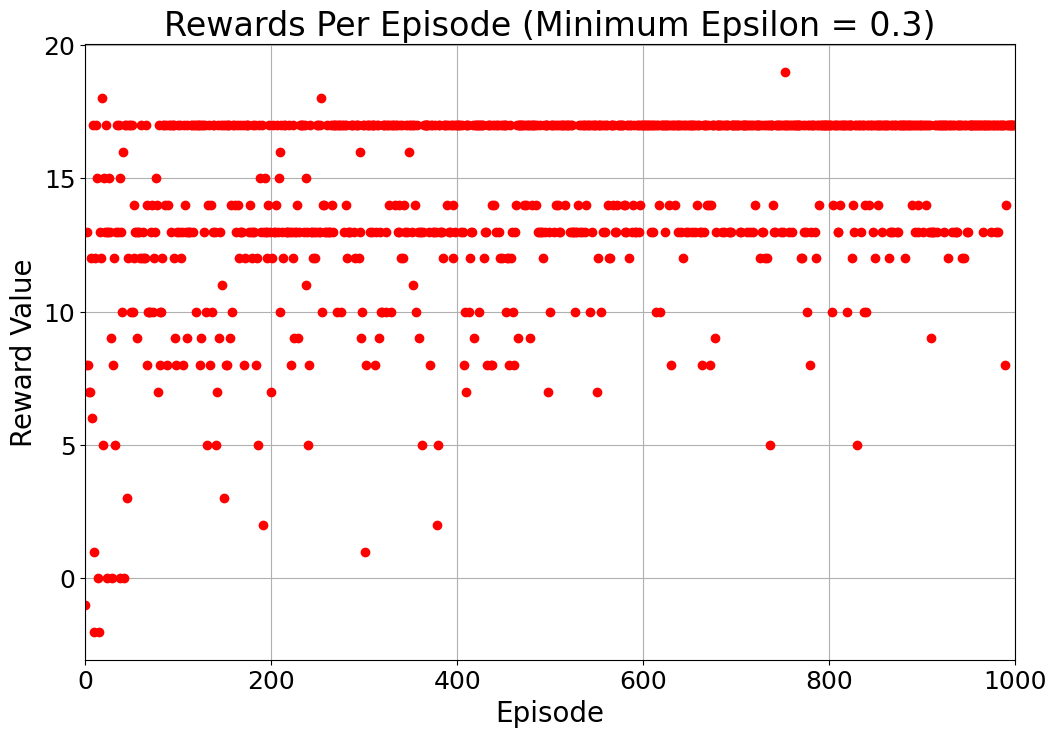

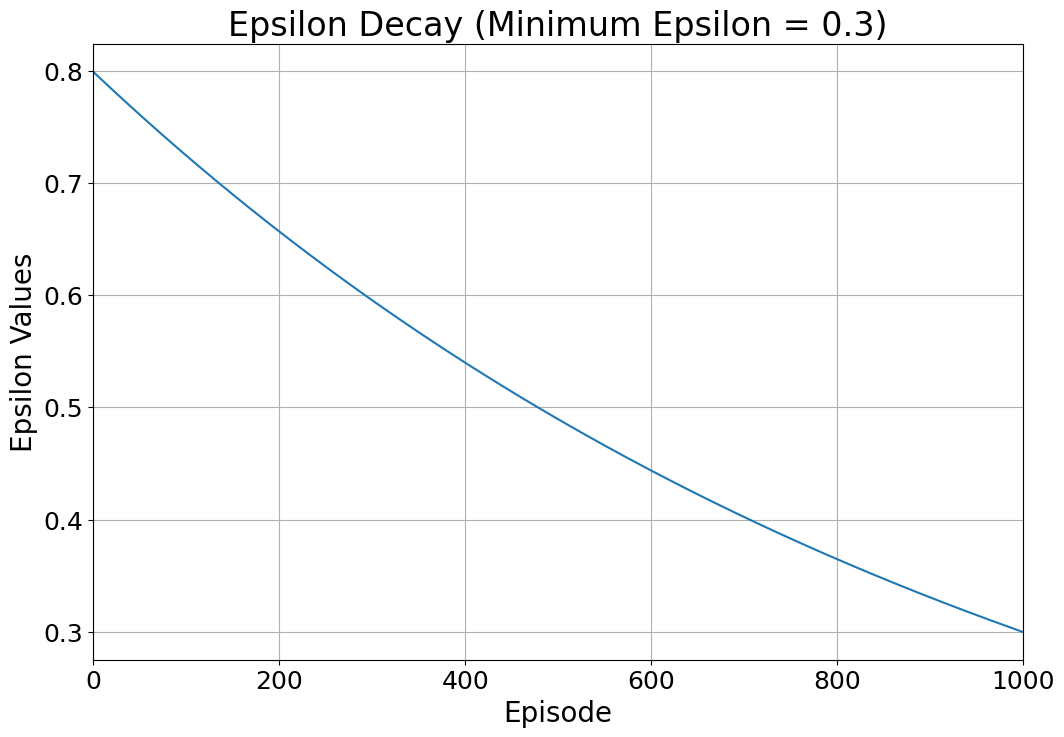

In [ ]:
# keeping all other hyperparameters constant and setting the maximum and minimum epsilon values as 0.8 and 0.3
num_episodes = 1000
alpha = 0.2
gamma = 0.95
epsilon = 1
maximum_epsilon = 0.8
minimum_epsilon = 0.3
epsilon_decay_rate = (minimum_epsilon/maximum_epsilon) ** (1/num_episodes)
SARSA_REWARDS, EPS, TIMESTEPS, Q = SARSA(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon)
plot_rewards(SARSA_REWARDS, num_episodes, f' (Minimum Epsilon = {minimum_epsilon})')
plot_epsilon(EPS, num_episodes, f' (Minimum Epsilon = {minimum_epsilon})')
# plot_timesteps(TIMESTEPS, num_episodes, f' (Minimum Epsilon = {minimum_epsilon})')

(iii) **Maximum Epsilon = 0.7**

**Minimum Epsilon = 0.4** 

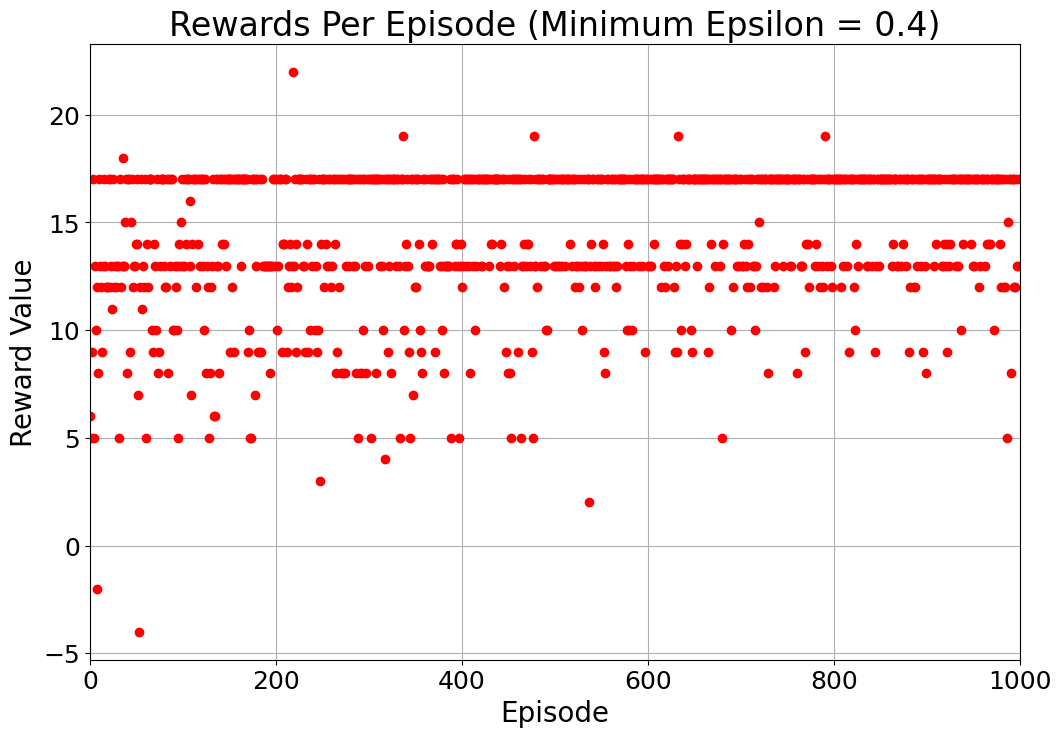

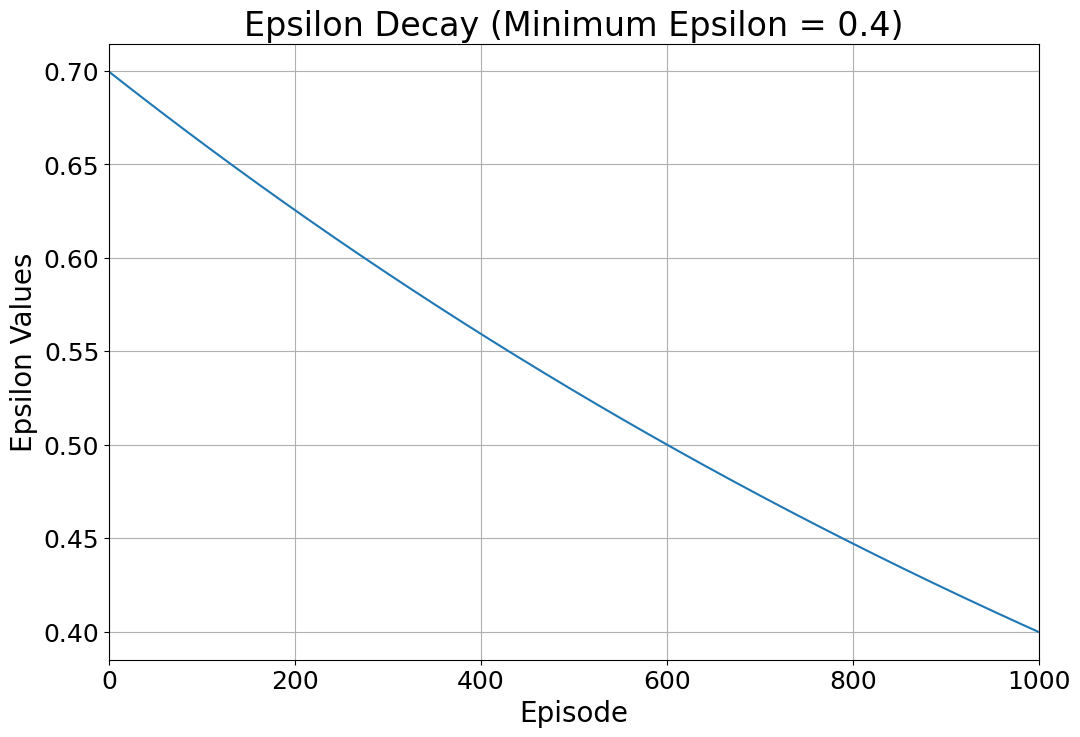

In [ ]:
# keeping all other hyperparameters constant and setting the maximum and minimum epsilon values as 0.7 and 0.4
num_episodes = 1000
alpha = 0.2
gamma = 0.95
epsilon = 1
maximum_epsilon = 0.7
minimum_epsilon = 0.4
epsilon_decay_rate = (minimum_epsilon/maximum_epsilon) ** (1/num_episodes)
SARSA_REWARDS, EPS, TIMESTEPS, Q = SARSA(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon)
plot_rewards(SARSA_REWARDS, num_episodes, f' (Minimum Epsilon = {minimum_epsilon})')
plot_epsilon(EPS, num_episodes, f' (Minimum Epsilon = {minimum_epsilon})')
# plot_timesteps(TIMESTEPS, num_episodes, f' (Minimum Epsilon = {minimum_epsilon})')

## **2. Tuning Discount Factor (gamma)**

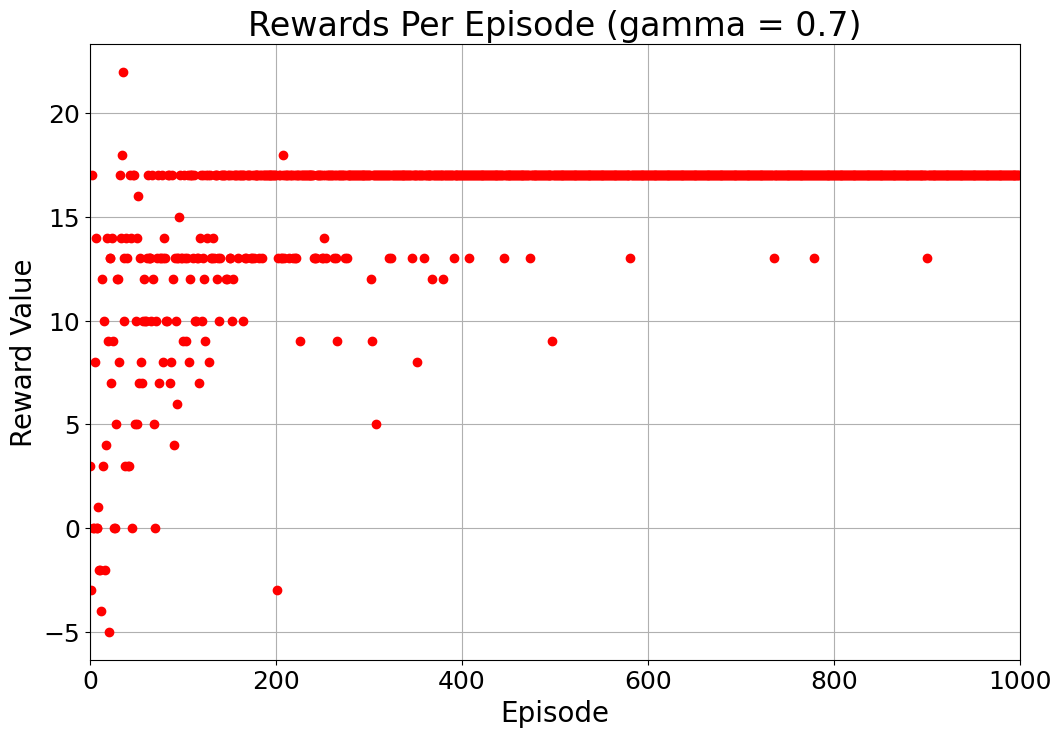

[[ 3.59039331  2.32102693  2.25190308  1.18111918]
 [ 5.13382523  1.81003742  2.97425352  1.37669864]
 [ 1.67246119  2.48647656  1.82795939  3.05131355]
 [-2.40196379  0.96516326  1.61875451  3.91012616]
 [ 0.89618479  0.84758013  1.19801508  3.75765517]
 [ 0.24184673  0.42821242  2.19236721 -0.02135595]
 [ 1.40266709  0.18903938  2.91824456 -4.35541179]
 [ 4.36053171  1.57756272  1.61747676  3.19495788]
 [ 4.49970093  2.25372313  2.09752647  6.22989527]
 [ 3.16755267  2.4808271  -0.7513283   7.30259561]
 [-3.13642599 -0.29361133  0.25814306  0.22805442]
 [ 2.18694666  0.05281666  0.38214158 -0.17116615]
 [ 5.90097344 -3.92499442  1.30538581  1.08890659]
 [ 8.89998835  3.35868007  3.43205349  4.28495533]
 [ 4.63211409  5.79583811  4.35705613  7.        ]
 [ 0.09469975  0.09701108 -0.10999638  0.33561995]
 [-0.20715514  0.14159956 -2.63628709  0.08516603]
 [ 3.00454175  0.01149237  0.34128718  0.01934609]
 [ 6.9984865   0.92943739  3.35799822  4.96163915]
 [ 6.84751747  4.56725685  3.74

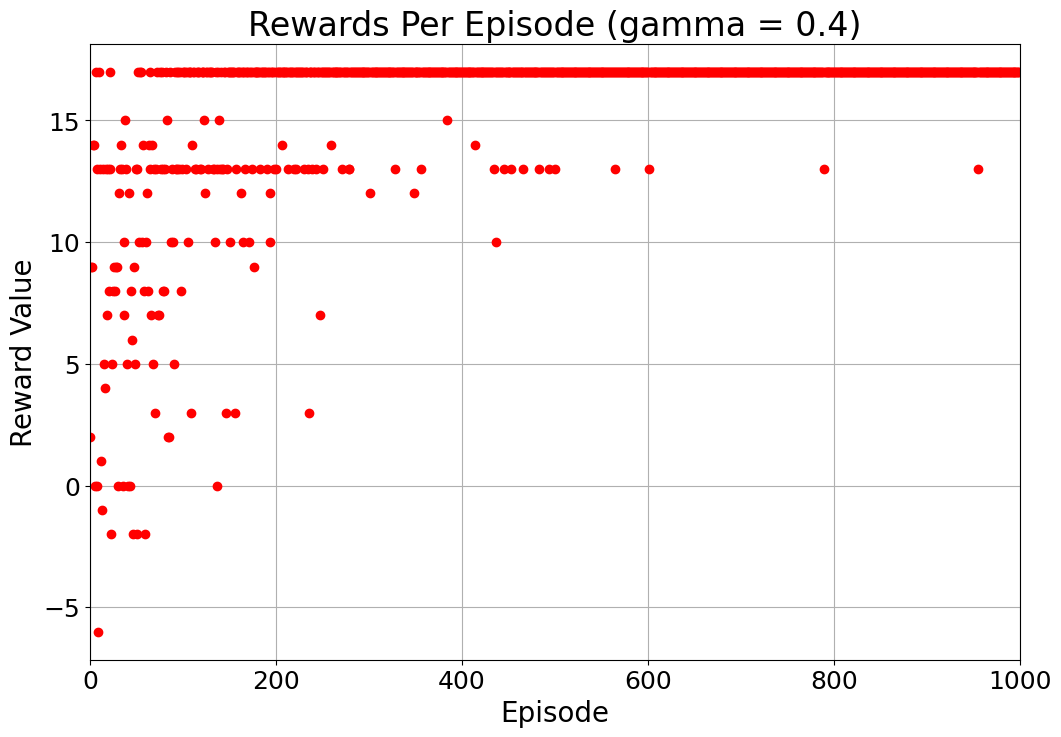

[[ 1.14047221  0.3942427   0.39435801  0.11803676]
 [ 3.14306748  0.31413543  0.23041524  0.31709945]
 [ 0.24485905  0.27637006  0.15135632  0.35820524]
 [-3.89380673  0.07858073  0.10555708  0.80485514]
 [ 0.01654877  0.16231869  0.02791001 -0.03275483]
 [ 0.00950346 -0.00186503  0.40521982  0.01874646]
 [ 0.14104861  0.0121682   1.04349102 -4.56122449]
 [ 0.89591544  0.20896859  0.08135737  0.58868291]
 [ 1.30779067  0.26878195  0.23973283  2.23998204]
 [ 0.24066087  0.20347039 -3.35391019  4.21966149]
 [-3.05383982 -0.10280189  0.00340311  0.15709398]
 [ 0.1061915  -0.01044515  0.02737345  0.07261793]
 [ 2.15417442 -4.27045011  0.16180785 -0.12951464]
 [ 5.6         0.77710015  0.66307057  1.49802496]
 [ 1.46885704  1.46679602  0.69462227  4.        ]
 [ 0.05250368  0.04093764 -0.11947773  0.63719067]
 [ 0.24160452  0.05884217 -0.03232803 -0.01585704]
 [ 1.25170901  0.01898435  0.25031049 -2.30765098]
 [ 2.28903517  0.11350925  1.47774499  3.97500551]
 [ 3.88982173  1.07798196  1.25

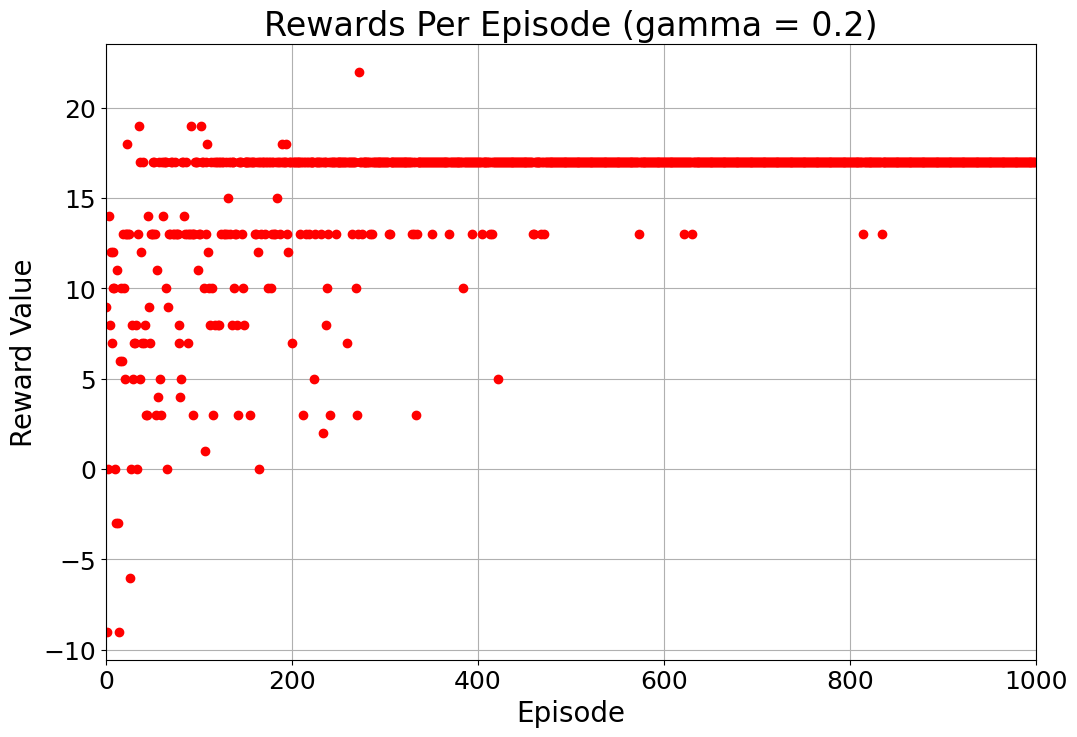

[[ 0.60136687  0.07793195  0.06823504  0.01199622]
 [ 3.00661262  0.05323334  0.23574729  0.03744756]
 [ 0.03001841  0.01960129  0.01039636  0.03127749]
 [-3.80817702  0.01299724  0.02208842  0.16951375]
 [ 0.02295063 -0.07283507  0.0361421   0.27244111]
 [-0.02001504 -0.00000713  0.09346143 -0.00697715]
 [ 0.02198371 -0.00003224  0.31498145 -4.98279561]
 [ 0.15576837  0.02949555  0.00766794  0.11431013]
 [ 0.4130928   0.02030359  0.0234912   0.86823454]
 [ 0.43861214  0.0900218  -2.65530405  1.05743792]
 [-0.59970329 -0.01783884  0.00107832  0.01238323]
 [-0.06201263 -0.04527685 -0.13161386 -0.0148677 ]
 [ 0.87943683 -3.94068159  0.02586904 -0.15961057]
 [ 4.4         0.13154352  0.12070096  0.38465388]
 [ 0.35369373  0.55809677  0.35511535  2.        ]
 [ 0.00033578  0.00490971  0.002426    0.00540038]
 [-0.02364987  0.08012732 -0.41580929 -0.02184979]
 [ 0.25828948 -0.01069196  0.03442597 -2.33938626]
 [ 1.99462341 -0.00430855  0.6886362   1.0941452 ]
 [ 1.80614331  0.36984749  0.48

In [ ]:
# keeping all other hyperparameters constant, this for loop iterates over difference values of Discount factor (gamma)
num_episodes = 1000
alpha = 0.2
gamma = 0.95
epsilon = 1
maximum_epsilon = 1
minimum_epsilon = 0.01
epsilon_decay_rate = (minimum_epsilon/maximum_epsilon) ** (1/num_episodes)

GAMMA = [0.7, 0.4, 0.2]
rewards = []
TS = []
for gamma in GAMMA:
  SARSA_REWARDS, EPS, TIMESTEPS, Q = SARSA(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon)
  plot_rewards(SARSA_REWARDS, num_episodes, f' (gamma = {gamma})')
  # plot_epsilon(EPS, num_episodes, f' (gamma = {gamma})')
  # plot_timesteps(TIMESTEPS, num_episodes, f' (gamma = {gamma})')
  print(Q)

## **3. Tuning Number of episodes**

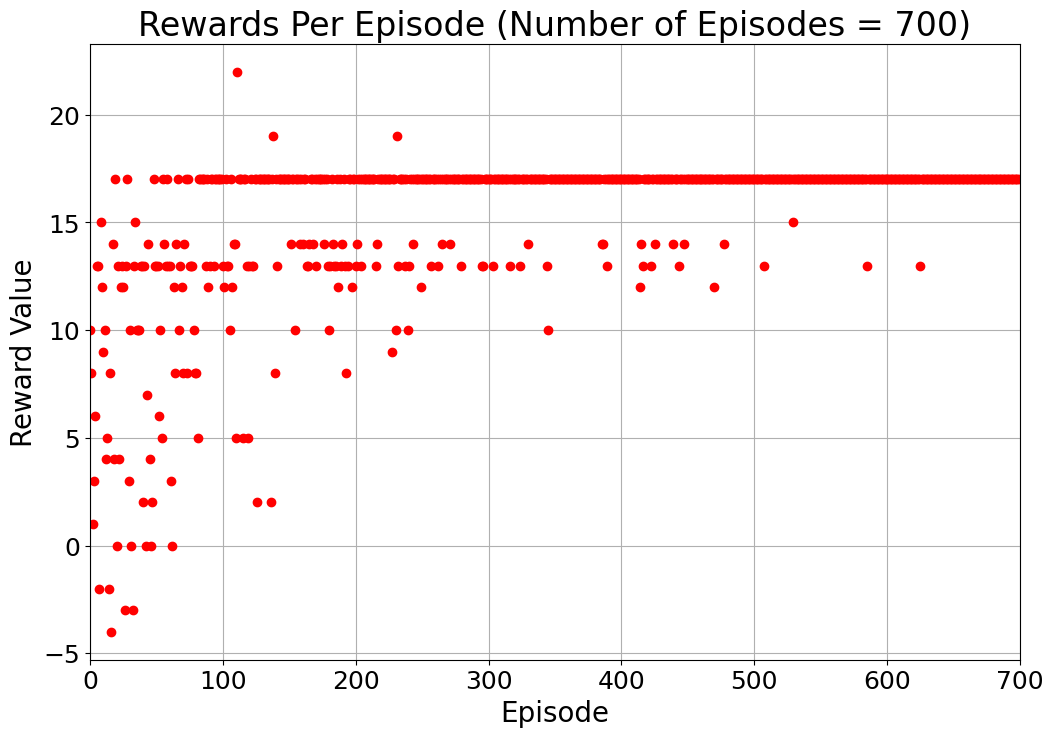

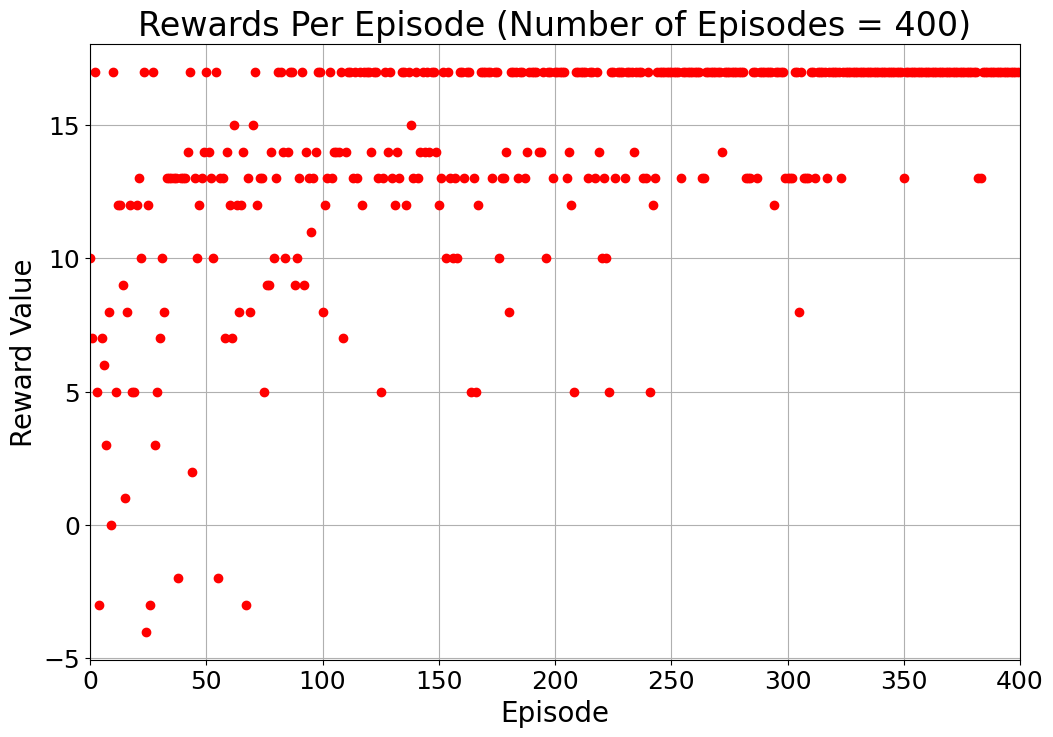

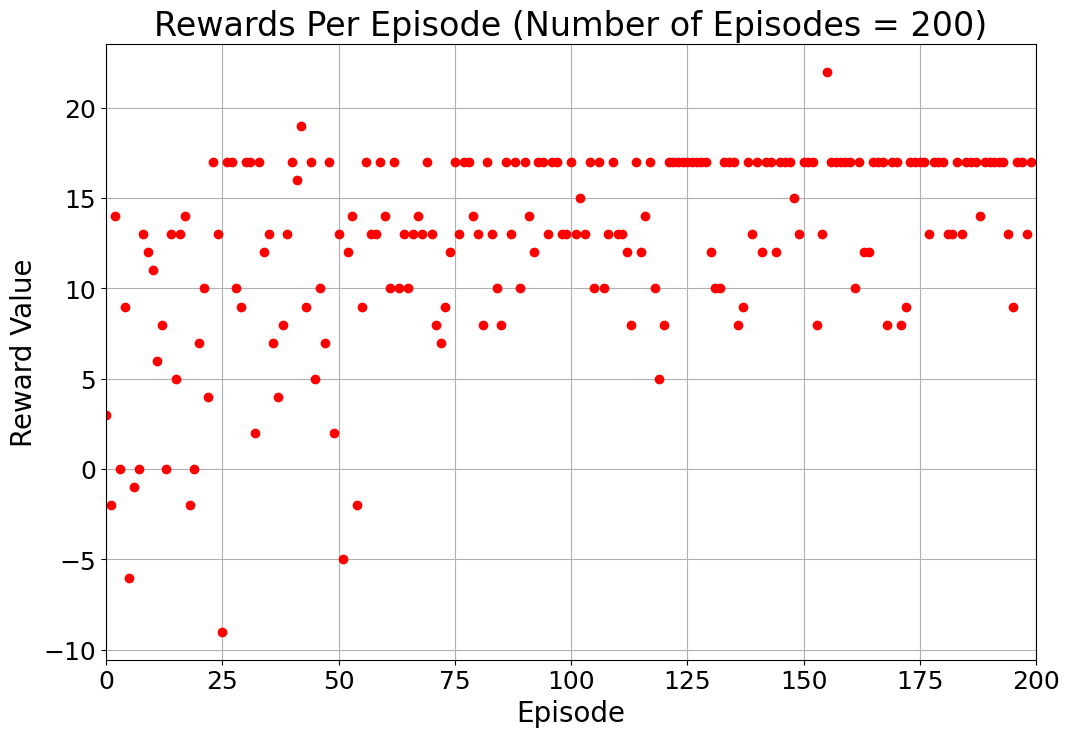

In [ ]:
# keeping all other hyperparameters constant, this for loop iterates over difference values of Total number of episodes
num_episodes = 1000
alpha = 0.2
gamma = 0.95
epsilon = 1
maximum_epsilon = 1
minimum_epsilon = 0.01
epsilon_decay_rate = (minimum_epsilon/maximum_epsilon) ** (1/num_episodes)

NE = [700, 400, 200]
rewards = []
TS = []
for num_episodes in NE:
  SARSA_REWARDS, EPS, TIMESTEPS, Q = SARSA(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon)
  plot_rewards(SARSA_REWARDS, num_episodes, f' (Number of Episodes = {num_episodes})')


# **Part-III: Solving Environment using Q-Learning**

In [ ]:
## Q-Learning 
def Q_learning(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon):
    # Q- table
    Q = np.zeros((state_space_size, action_space_size))
    Q_REWARDS = []
    EPS=[]
    TIMESTEPS = []
    epsilon = maximum_epsilon
    for episode in range(num_episodes):
        state = env.reset()    # reset the environment for every episode
        step = 0
        status = False
        total_rewards = 0
        c=0
        while not status:    # until the agent reaches home
            if np.random.uniform(0, 1) > epsilon:
                action = np.argmax(Q[state, :])  # Exploit (using gained knowledge about environment)
            else:
                action = env.action_space.sample()  # Explore
            
            new_state, reward, status = env.step(action)   # get the next state, reward and status of the enviroment using the present state
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])   # Q-matrix update
            total_rewards += reward
            state = new_state
            c+=1
        
        if epsilon>minimum_epsilon:    # update epsilon value for after each episode
          epsilon = epsilon * epsilon_decay_rate

        Q_REWARDS.append(total_rewards)
        EPS.append(epsilon)
        TIMESTEPS.append(c)
    return Q_REWARDS, EPS, TIMESTEPS, Q

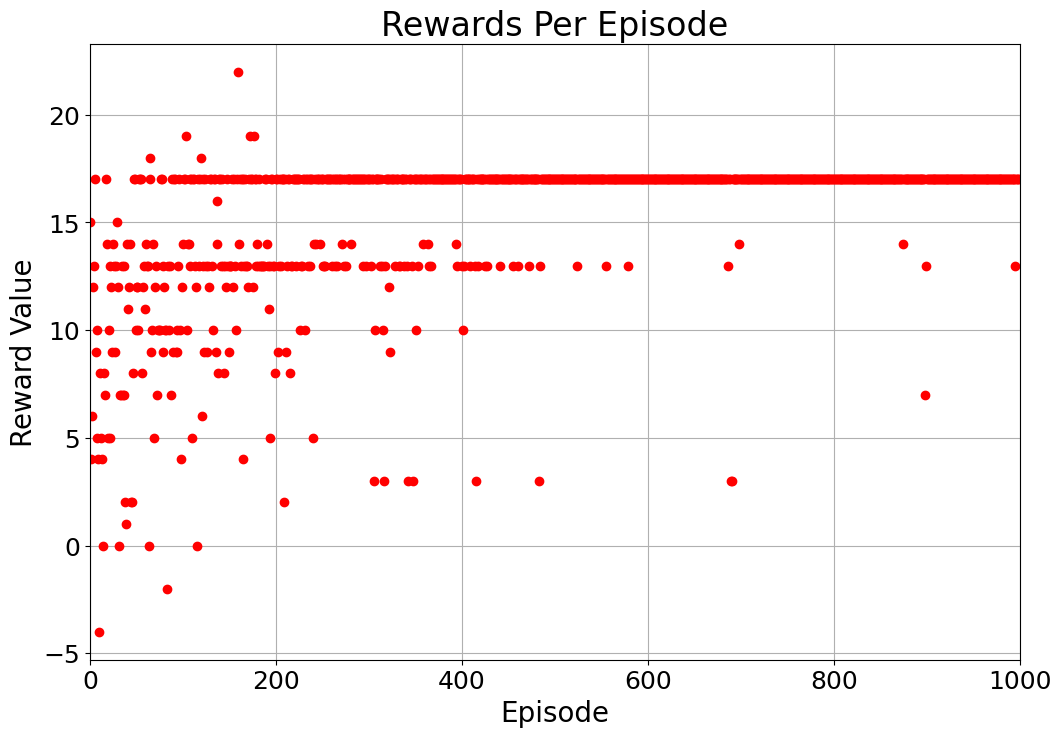

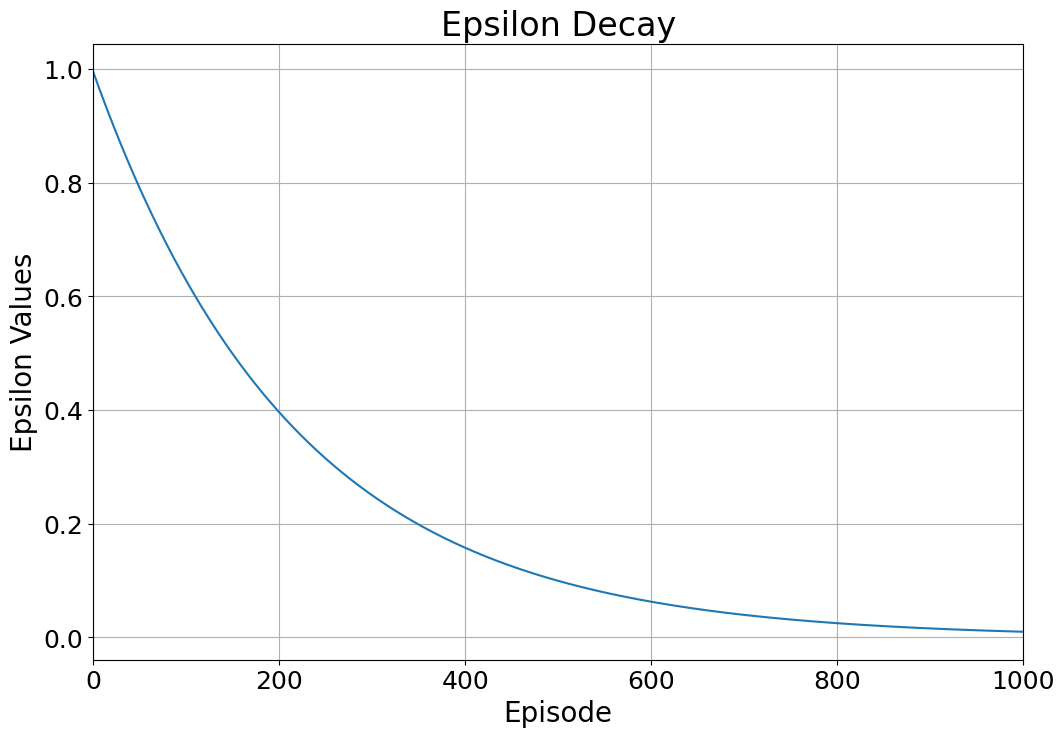

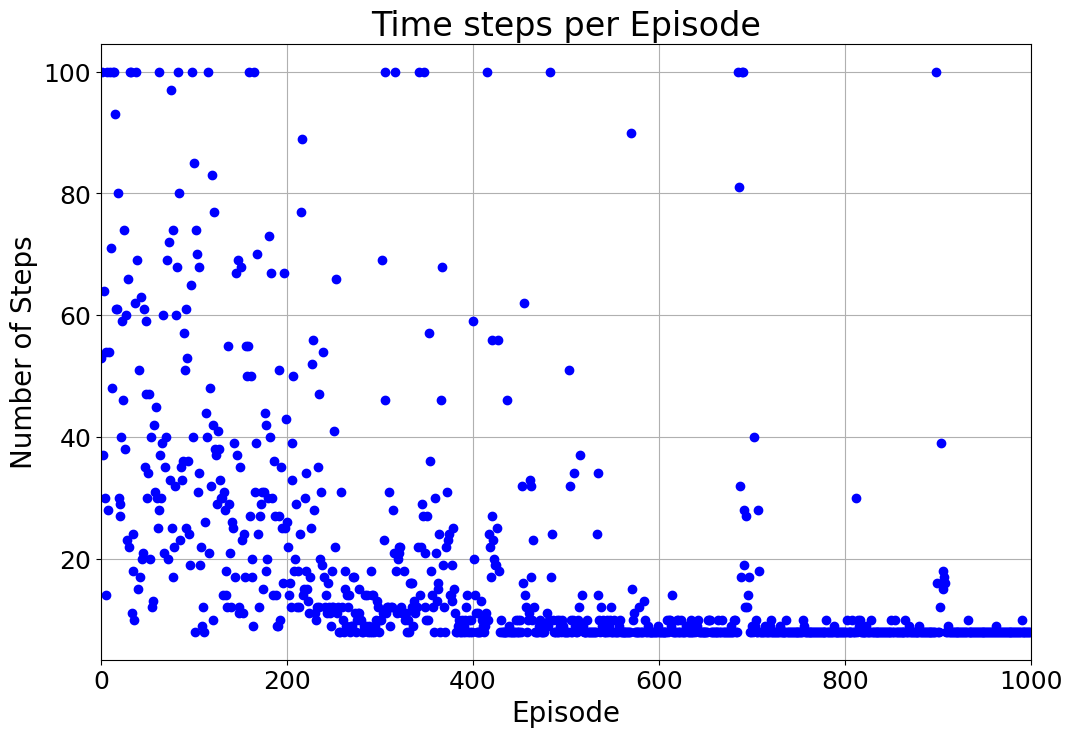

In [ ]:
num_episodes = 1000  # total number of episodes
alpha = 0.2  # learning rate
gamma = 0.95  # discount factor
epsilon = 1  # initializing epsilon value (exploration-exploitation trade-off)
maximum_epsilon = 1   # maximum value of the epsilon
minimum_epsilon = 0.01  # minimum value of the epsilon
epsilon_decay_rate = (minimum_epsilon/maximum_epsilon) ** (1/num_episodes)    # calculation of epsilon decay rate
Q_REWARDS, EPS, TIMESTEPS, Q = Q_learning(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon)

plot_rewards(Q_REWARDS, num_episodes, '')
plot_epsilon(EPS, num_episodes, '')
plot_timesteps(TIMESTEPS, num_episodes, '')

# **Evaluation of the Q- Learning algorithm - Plot for 10 episodes where Agenet forces to take greedy actions**

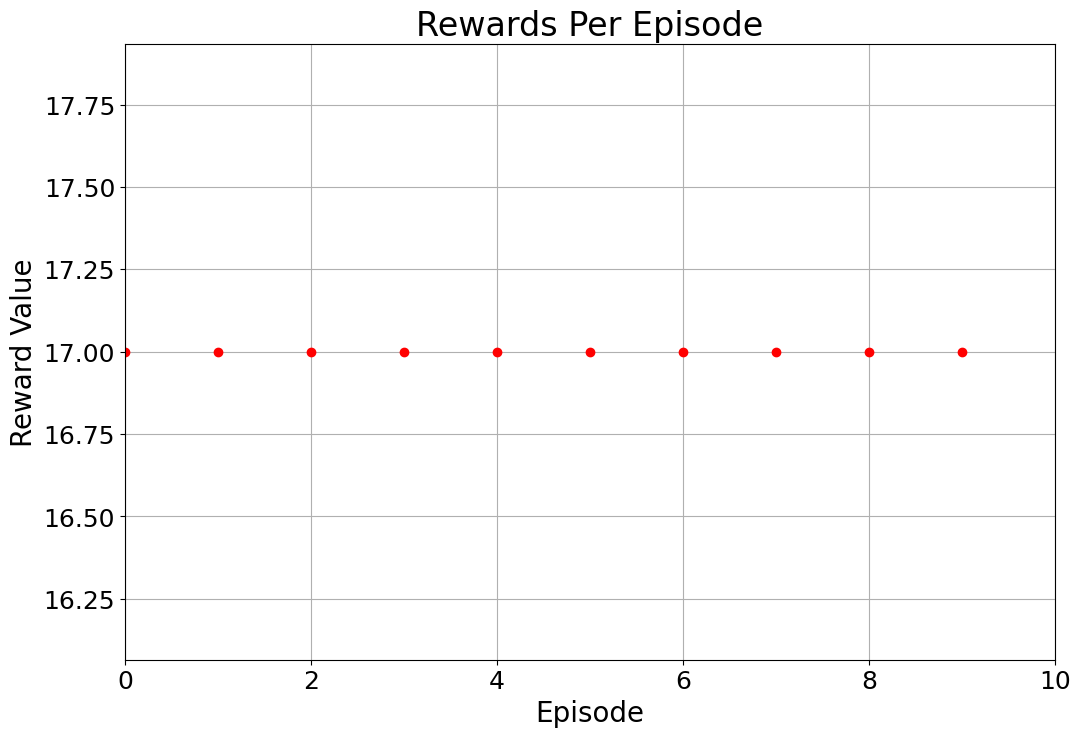

In [ ]:
## Q-Learning: Run this cell after running the previous cell
def Q_learning_eval(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon):
    Q_REWARDS = []
    EPS=[]
    TIMESTEPS = []
    epsilon = minimum_epsilon   # NOTICE THE CHANGE
    for episode in range(num_episodes):
        state = env.reset()
        step = 0
        status = False
        total_rewards = 0

        while not status:
            if np.random.uniform(0, 1) > epsilon:
                action = np.argmax(Q[state, :])  # Exploit
            else:
                action = env.action_space.sample()  # Explore
            
            new_state, reward, status = env.step(action)
            #Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])
            total_rewards += reward
            state = new_state
        
        if epsilon>minimum_epsilon:
          epsilon = epsilon * epsilon_decay_rate

        Q_REWARDS.append(total_rewards)
        
    return Q_REWARDS

Q_REWARDS = Q_learning_eval(10, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon)
plot_rewards(Q_REWARDS, 10, '')

## **1. Tuning Minimum value and Maximum values of Epsilon**

(i) **Maximum Epsilon = 0.9**

**Minimum Epsilon = 0.2** 


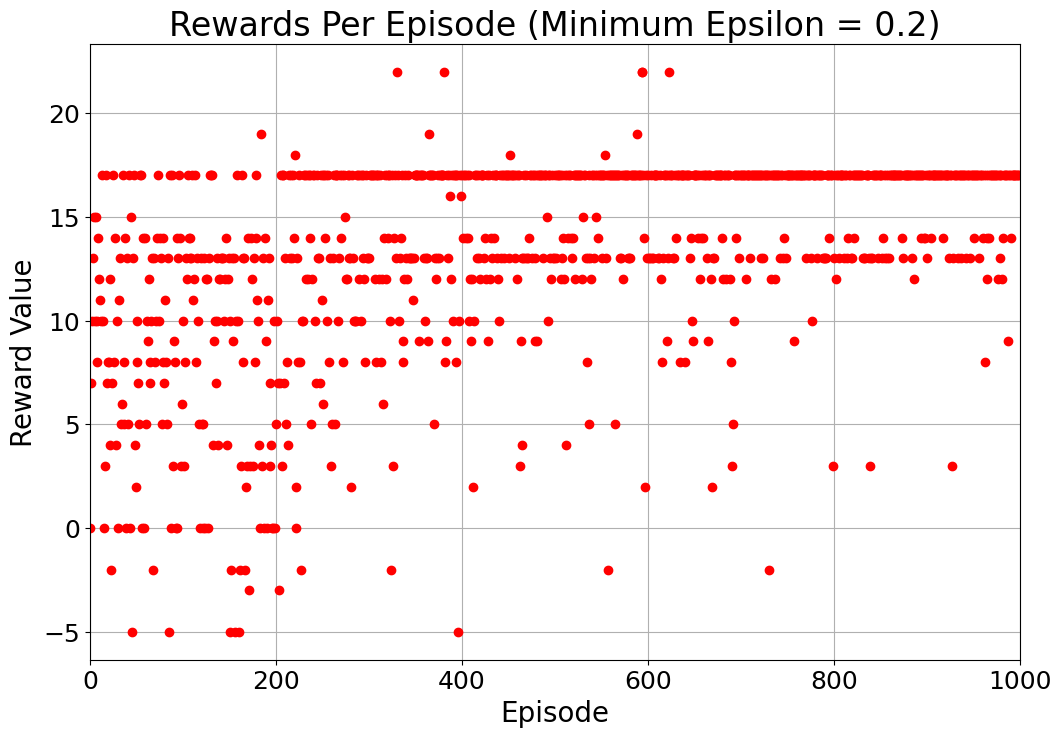

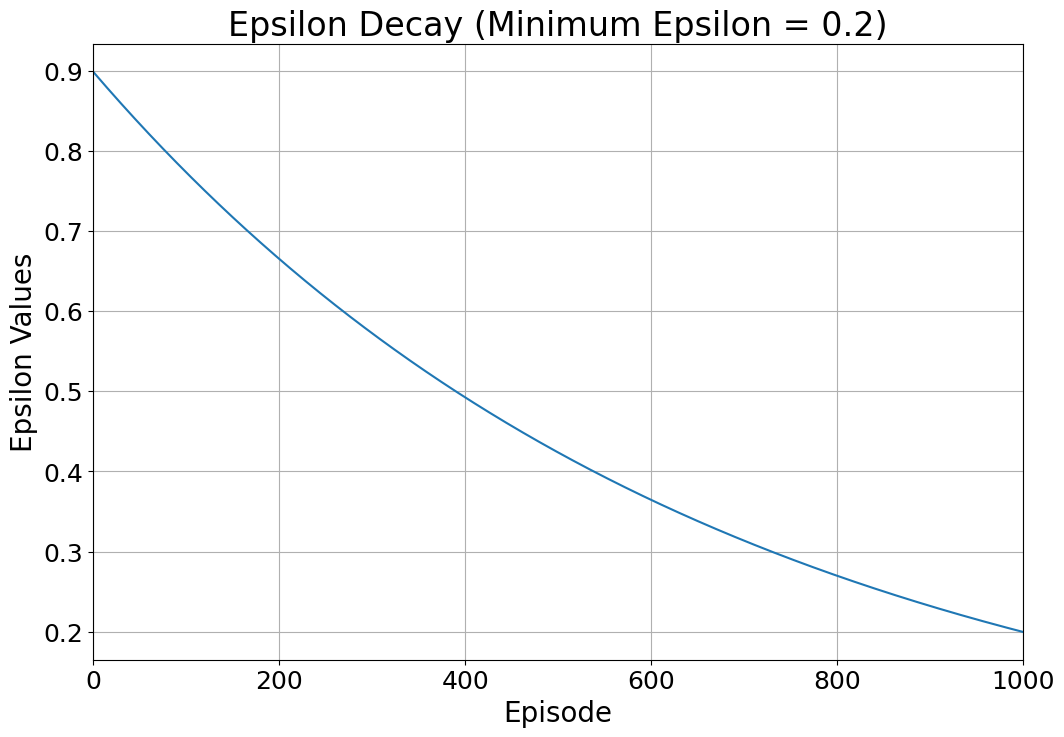

In [ ]:
# keeping all other hyperparameters constant and setting the maximum and minimum epsilon values as 0.9 and 0.2
num_episodes = 1000
alpha = 0.2
gamma = 0.95
maximum_epsilon = 0.9
minimum_epsilon = 0.2
epsilon_decay_rate = (minimum_epsilon/maximum_epsilon) ** (1/num_episodes)
Q_REWARDS, EPS, TIMESTEPS, Q = Q_learning(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon)   # calling Q-learning function 
plot_rewards(Q_REWARDS, num_episodes, f' (Minimum Epsilon = {minimum_epsilon})')
plot_epsilon(EPS, num_episodes, f' (Minimum Epsilon = {minimum_epsilon})')
# plot_timesteps(TIMESTEPS, num_episodes, f' (Minimum Epsilon = {minimum_epsilon})')

(ii) **Maximum Epsilon = 0.8**

**Minimum Epsilon = 0.3** 


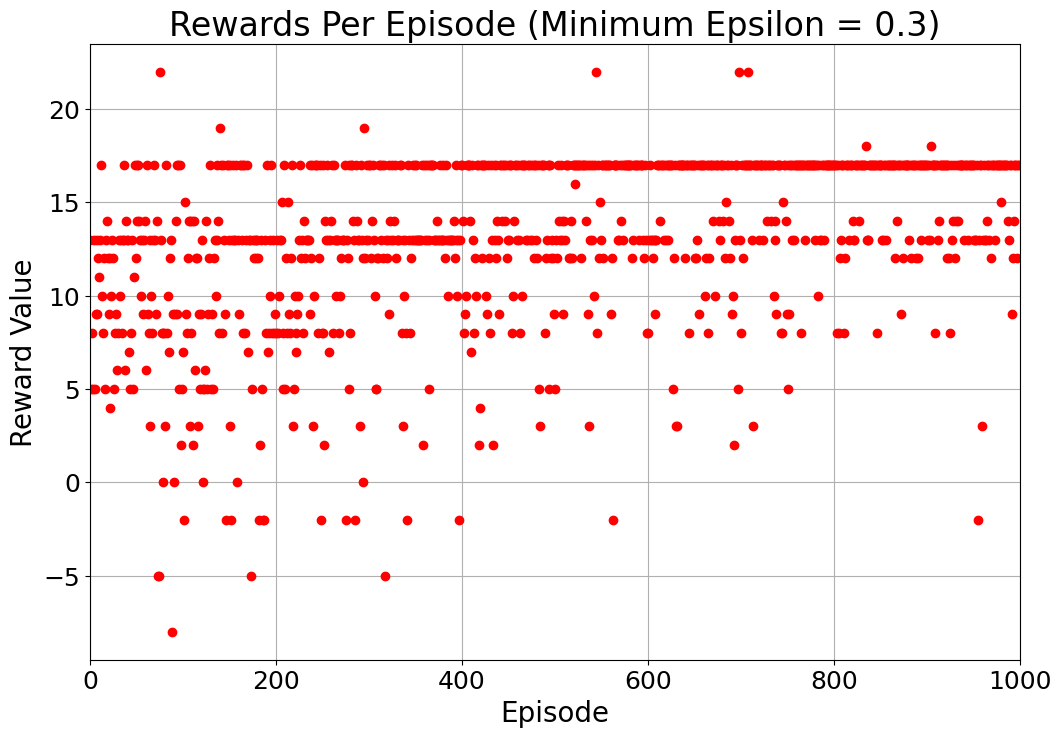

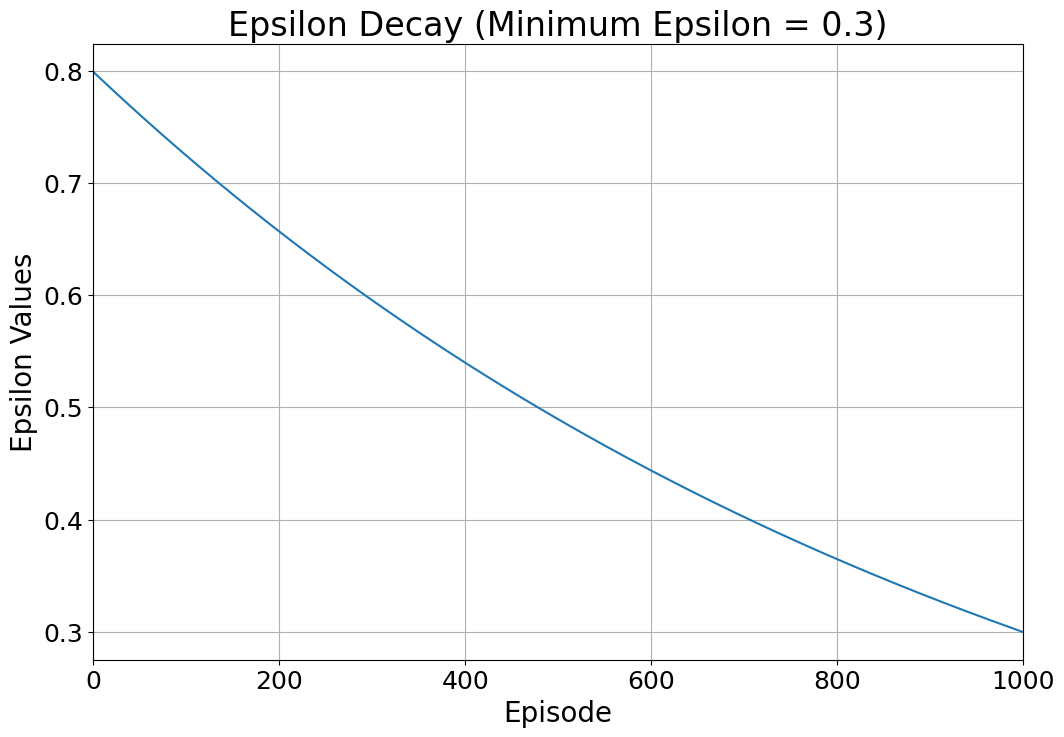

In [ ]:
# keeping all other hyperparameters constant and setting the maximum and minimum epsilon values as 0.8 and 0.3
num_episodes = 1000
alpha = 0.2
gamma = 0.95
maximum_epsilon = 0.8
minimum_epsilon = 0.3
epsilon_decay_rate = (minimum_epsilon/maximum_epsilon) ** (1/num_episodes)
Q_REWARDS, EPS, TIMESTEPS, Q = Q_learning(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon)   # calling Q-learning function 
plot_rewards(Q_REWARDS, num_episodes, f' (Minimum Epsilon = {minimum_epsilon})')
plot_epsilon(EPS, num_episodes, f' (Minimum Epsilon = {minimum_epsilon})')
# plot_timesteps(TIMESTEPS, num_episodes, f' (Minimum Epsilon = {minimum_epsilon})')

(iii) **Maximum Epsilon = 0.7**

**Minimum Epsilon = 0.4** 


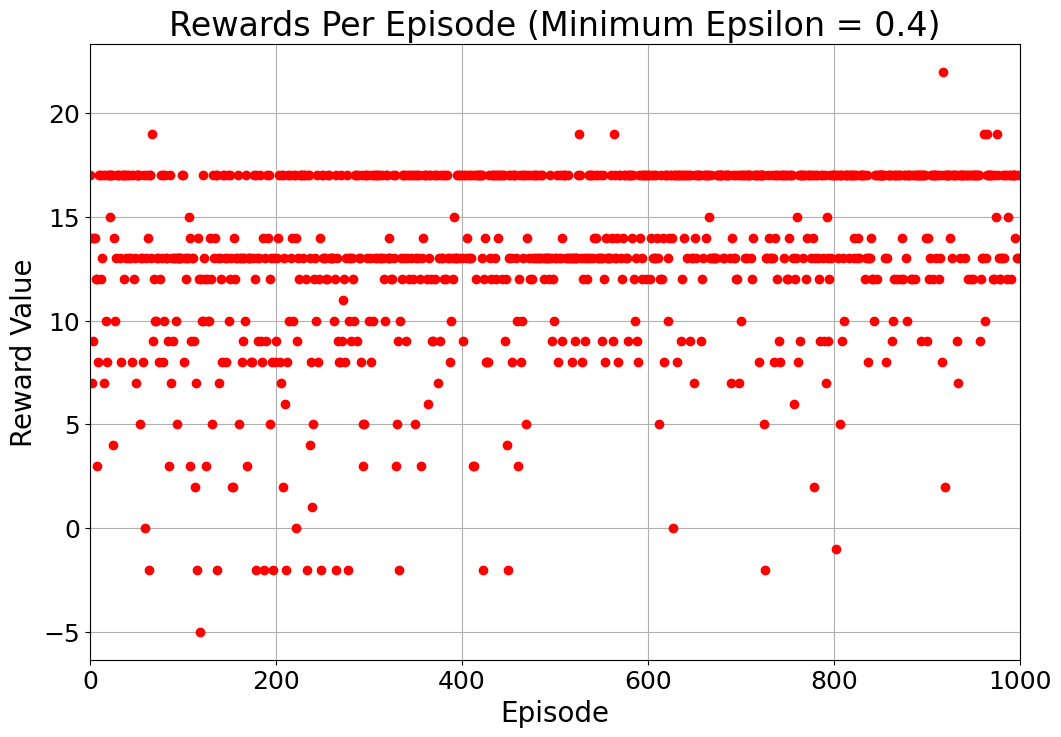

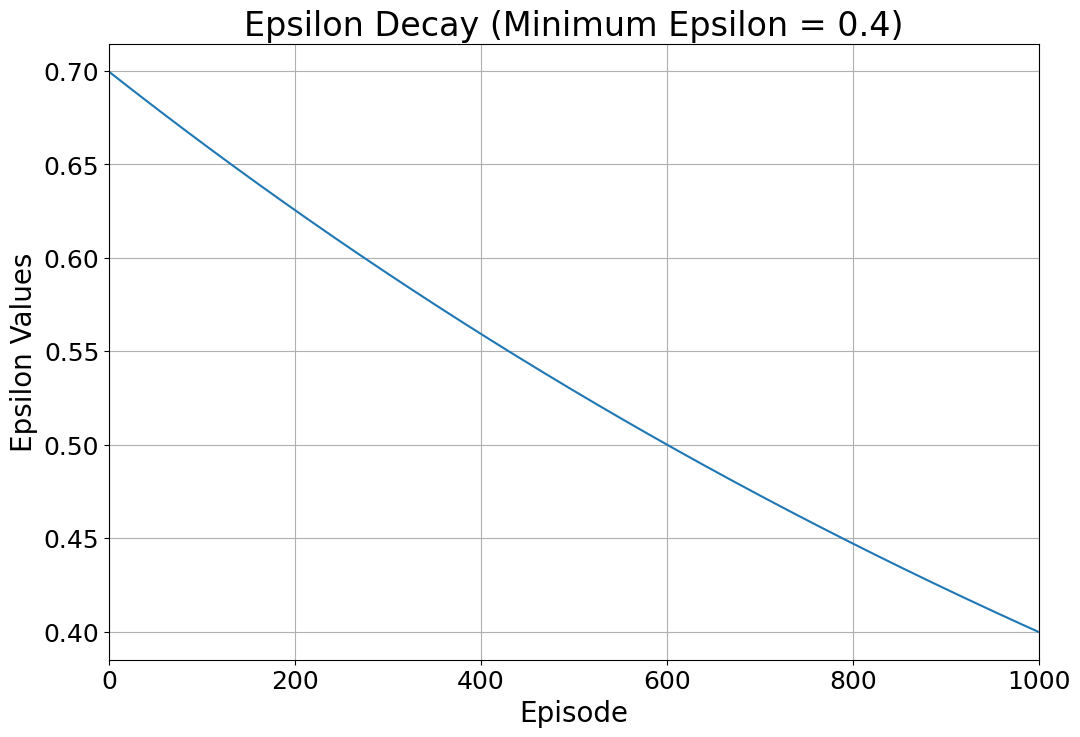

In [ ]:
# keeping all other hyperparameters constant and setting the maximum and minimum epsilon values as 0.7 and 0.4
num_episodes = 1000
alpha = 0.2
gamma = 0.95
maximum_epsilon = 0.7
minimum_epsilon = 0.4
epsilon_decay_rate = (minimum_epsilon/maximum_epsilon) ** (1/num_episodes)
Q_REWARDS, EPS, TIMESTEPS, Q = Q_learning(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon)   # calling Q-learning function 
plot_rewards(Q_REWARDS, num_episodes, f' (Minimum Epsilon = {minimum_epsilon})')
plot_epsilon(EPS, num_episodes, f' (Minimum Epsilon = {minimum_epsilon})')
# plot_timesteps(TIMESTEPS, num_episodes, f' (Minimum Epsilon = {minimum_epsilon})')

## **2. Tuning Discount Factor (gamma)**

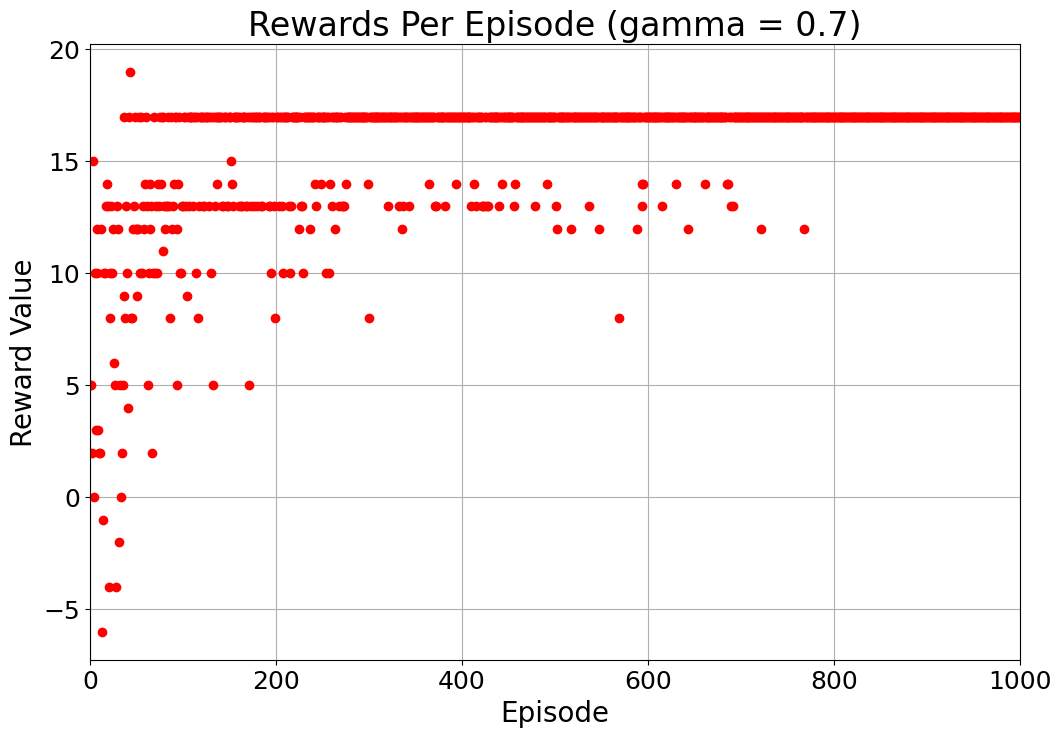

[[ 3.58653269  2.41929585  2.40086147  1.4550806 ]
 [ 5.10739705  2.34176193  3.2551394   2.08731766]
 [ 2.94589908  2.93860813  2.12240381  2.98528757]
 [-0.52165324  2.09323926  2.99209686  4.26946557]
 [ 2.90466846  2.55744622  3.11366373  5.3077747 ]
 [ 2.091977    1.20340715  1.31516842  1.33289535]
 [ 3.02940803  1.390875    2.84876324 -2.34815193]
 [ 4.25594166  2.06922408  2.12104537  4.23899482]
 [ 4.99950965  2.93136897  2.99707104  6.12994444]
 [ 4.6528065   3.96191894  0.94353076  6.8309446 ]
 [-0.07074843  1.12140032  0.94345289  1.77547232]
 [ 4.2306506   1.28745928  1.3155046   1.93873203]
 [ 5.97815587 -1.94853497  2.90101414  3.37710366]
 [ 8.85601953  4.30636036  4.28269067  4.8999947 ]
 [ 4.89999971  6.19384084  4.76279228  7.        ]
 [ 2.02858924  1.83900814  1.34746684  1.77146861]
 [ 3.35762717  1.84757314  0.67806387  1.63570015]
 [ 4.8986987   1.75777177  3.41870947  2.48799104]
 [ 6.97257555  3.31594434  5.48799283  7.        ]
 [ 6.99996235  4.8999491   4.89

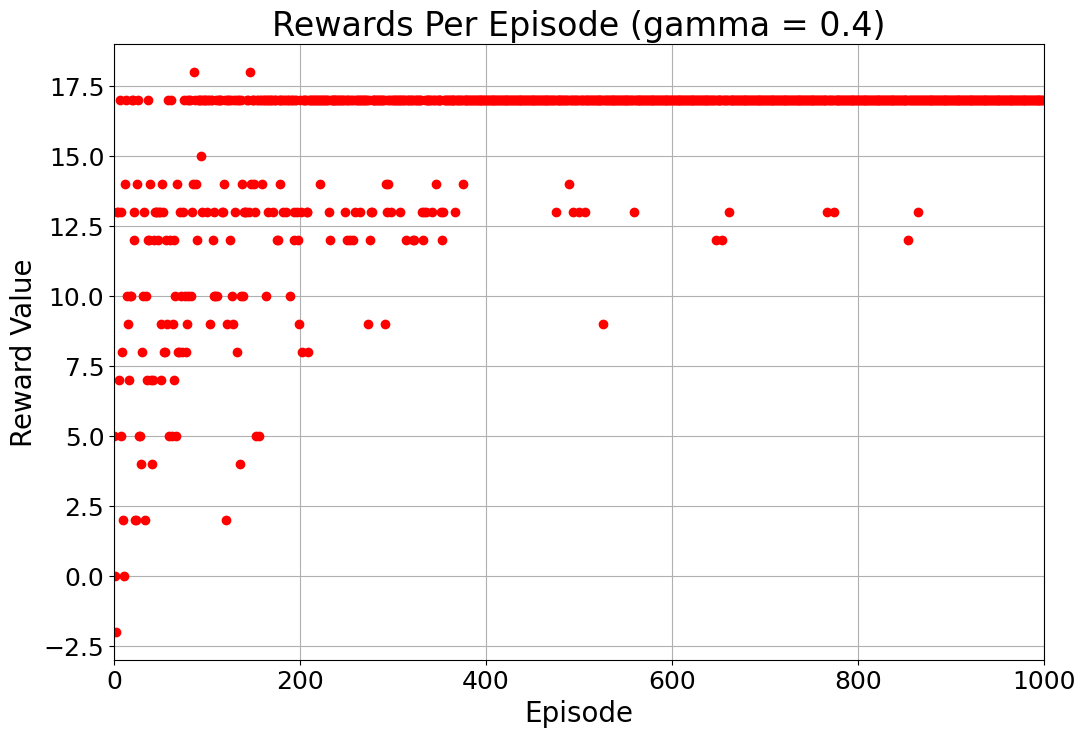

[[ 1.257344    0.45597388  0.37294679  0.12473367]
 [ 3.14336     0.38189674  0.54802518  0.3706792 ]
 [ 0.34369709  0.34382364  0.15389372  0.3584    ]
 [-3.17699159  0.1841232   0.32760955  0.87562729]
 [ 0.46422273  0.22965046  0.54882384  1.38686586]
 [ 0.34197802  0.08176451  0.23348473  0.15974571]
 [ 0.33452267  0.10929945  1.12701581 -4.41481742]
 [ 0.86348012  0.36350017  0.1873759   0.896     ]
 [ 1.21311531  0.35491699  0.33844283  2.22612663]
 [ 1.24214053  0.78342346 -2.74958569  2.06295026]
 [-2.78792794  0.23329207  0.10531174  0.4911414 ]
 [ 0.8645379   0.2645096   0.2186095   0.33017673]
 [ 2.24       -4.48300505  0.34911613  0.63952074]
 [ 5.6         0.87910224  0.86858466  1.59999633]
 [ 1.59999961  2.16476608  1.06916793  4.        ]
 [ 0.25429654  0.23126143  0.18628925  2.00041643]
 [ 0.63582122  0.48980128 -2.11453546  0.25955688]
 [ 1.59999438  0.27479359  0.69392313 -1.01617853]
 [ 3.99118236  0.63719558  2.07229512  4.        ]
 [ 3.9999968   1.59998371  1.65

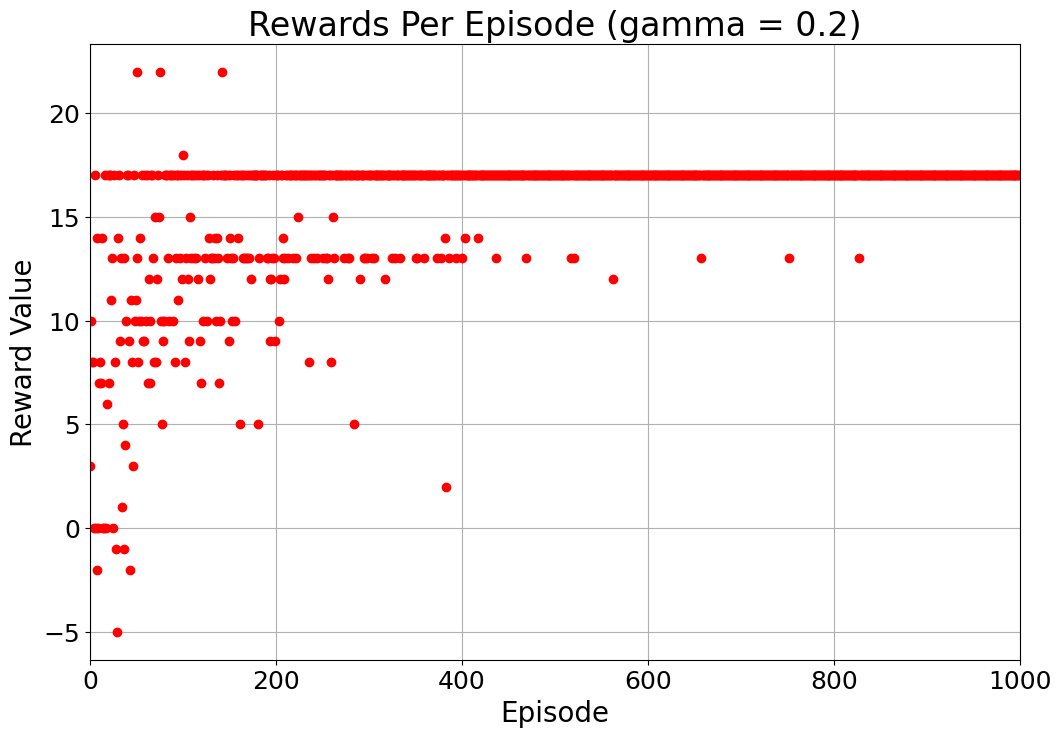

[[ 0.601408    0.07075903  0.06527129  0.00828253]
 [ 3.00704     0.07570153  0.23513308  0.03625843]
 [ 0.03301215  0.03128804  0.0112709   0.0352    ]
 [-3.83795494  0.00911865  0.03180705  0.17471992]
 [ 0.10272408  0.02324888  0.11774682  0.86133475]
 [ 0.05627692  0.00695545  0.02222691  0.01968767]
 [ 0.03842201  0.00546457  0.37937785 -4.9130868 ]
 [ 0.176       0.04254795  0.01587824  0.1349445 ]
 [ 0.88        0.03363775  0.03388588  0.66445033]
 [ 0.8015004   0.17265432 -3.80498702  4.4       ]
 [-3.5944272   0.03274556  0.01034788  0.07106933]
 [ 0.13652152  0.05592231  0.04099742  0.02873014]
 [ 0.72540685 -2.46577907  0.02656547  0.0794363 ]
 [ 2.98590083  0.13699397  0.14847332  0.39997467]
 [ 0.39999997  0.65209396  0.85293131  2.        ]
 [ 0.01895187  0.07160313  0.02104617  0.67280707]
 [ 0.0798333   0.05129939 -2.77854759  0.06294681]
 [ 0.39999029  0.03619816  0.10470073 -2.08722542]
 [ 2.          0.07938787  0.6353205   1.97338945]
 [ 1.99999991  0.39999999  0.40

In [ ]:
# keeping all other hyperparameters constant, this for loop iterates over difference values of Discount factor (gamma)
num_episodes = 1000
alpha = 0.2
# gamma = 0.95
maximum_epsilon = 1
minimum_epsilon = 0.01
epsilon_decay_rate = (minimum_epsilon/maximum_epsilon) ** (1/num_episodes)

GAMMA = [0.7, 0.4, 0.2]
rewards = []
TS = []
for gamma in GAMMA:
  Q_REWARDS, EPS, TIMESTEPS, Q = Q_learning(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon)
  plot_rewards(Q_REWARDS, num_episodes, f' (gamma = {gamma})')
  # plot_epsilon(EPS, num_episodes, f' (gamma = {gamma})')
  # plot_timesteps(TIMESTEPS, num_episodes, f' (gamma = {gamma})')
  print(Q)

## **3. Tuning Number of episodes**

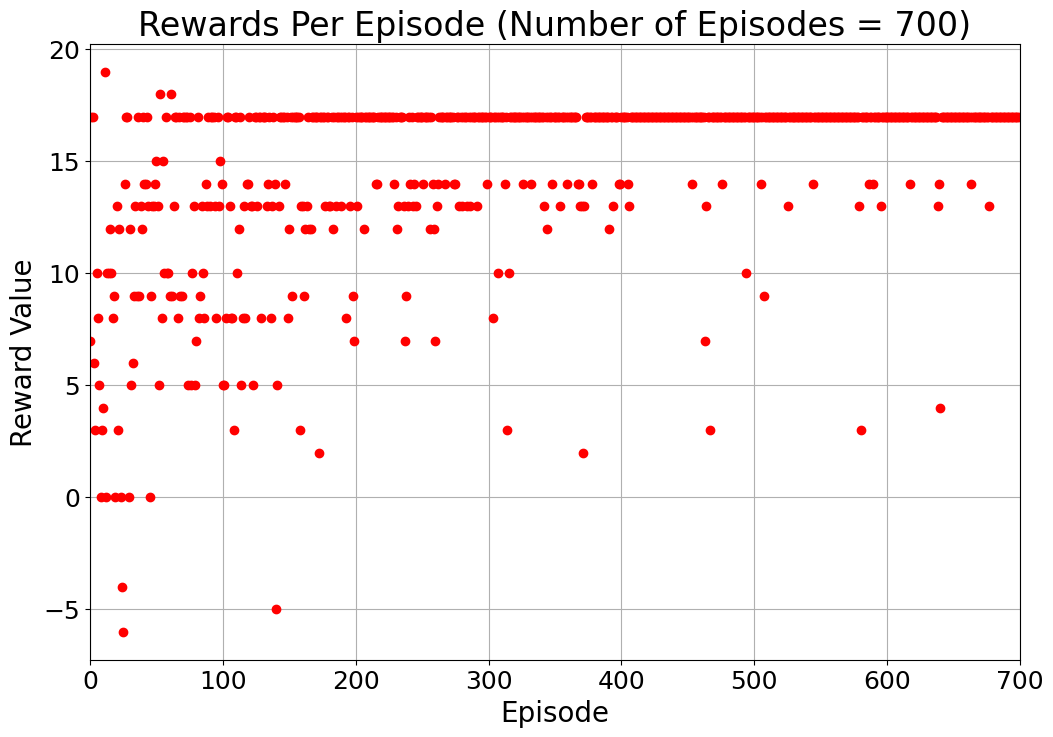

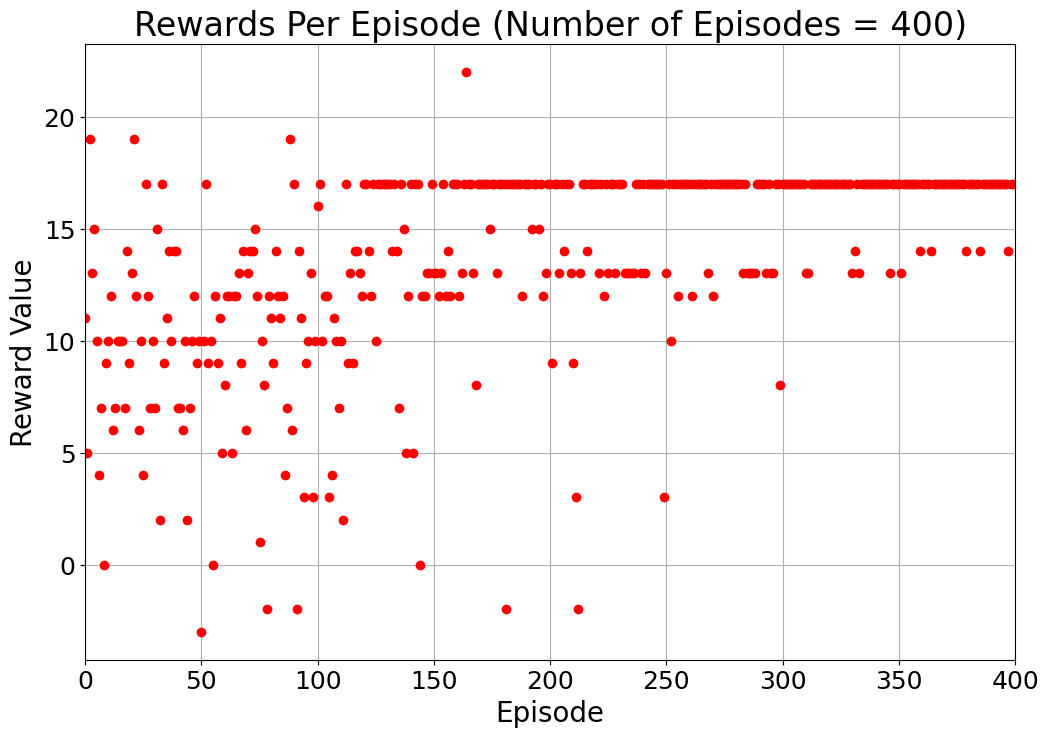

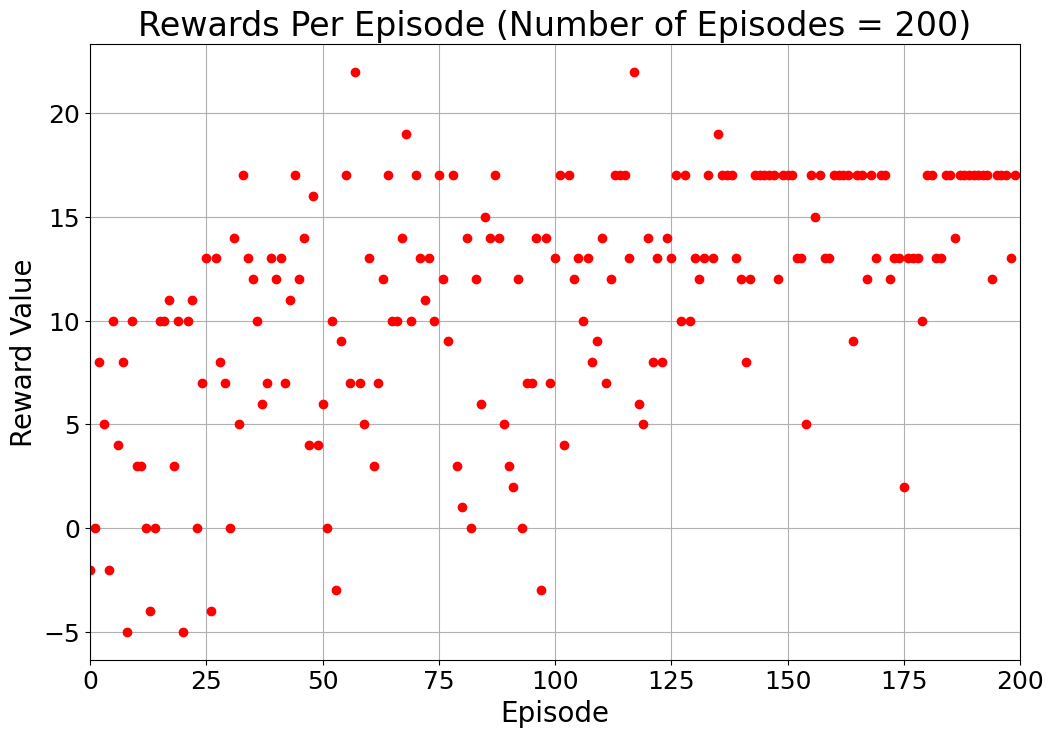

In [ ]:
# keeping all other hyperparameters constant, this for loop iterates over difference values of Total number of episodes
# num_episodes = 1000
alpha = 0.2
gamma = 0.95
epsilon = 1
maximum_epsilon = 1
minimum_epsilon = 0.01
epsilon_decay_rate = (minimum_epsilon/maximum_epsilon) ** (1/num_episodes)

NE = [700, 400, 200]
rewards = []
TS = []
for num_episodes in NE:
  Q_REWARDS, EPS, TIMESTEPS, Q = Q_learning(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon)
  plot_rewards(Q_REWARDS, num_episodes, f' (Number of Episodes = {num_episodes})')


# **Comparison of SARSA and Q-learning algorithms on Same Environment**

In [ ]:
# SARSA and Q-learning algorithms

## SARSA function
def SARSA(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon):
    # Q- table
    Q = np.zeros((state_space_size, action_space_size))
    SARSA_REWARDS = []
    EPS=[]
    TIMESTEPS = []
    epsilon = maximum_epsilon
    for episode in range(num_episodes):
        state = env.reset()
        step = 0
        status = False
        total_rewards = 0
        if np.random.uniform(0,1) > epsilon:
            action = np.argmax(Q[state, :])  # Exploit (using gained knowledge about environment)
        else:
            action = env.action_space.sample()  # Explore
        c= 0
        while not status:
            new_state, reward, status = env.step(action)
            if np.random.uniform(0,1) > epsilon:
                new_action = np.argmax(Q[new_state, :])  # Exploit
            else:
                new_action = env.action_space.sample()  # Explore
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[new_state, new_action] - Q[state, action])    # SARSA algorithm Q-value update expression
            total_rewards += reward
            state, action = new_state, new_action
            c+=1
        if epsilon > minimum_epsilon:   # updating the epsilon value
          epsilon = epsilon * epsilon_decay_rate

        SARSA_REWARDS.append(total_rewards)
        EPS.append(epsilon)
        TIMESTEPS.append(c)
    return SARSA_REWARDS, EPS, TIMESTEPS, Q

## Q-Learning 
def Q_learning(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon):
    # Q- table
    Q = np.zeros((state_space_size, action_space_size))
    Q_REWARDS = []
    EPS=[]
    TIMESTEPS = []
    epsilon = maximum_epsilon
    for episode in range(num_episodes):
        state = env.reset()
        step = 0
        status = False
        total_rewards = 0
        c=0
        while not status:
            if np.random.uniform(0, 1) > epsilon:
                action = np.argmax(Q[state, :])  # Exploit
            else:
                action = env.action_space.sample()  # Explore
            
            new_state, reward, status = env.step(action)
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])
            total_rewards += reward
            state = new_state
            c+=1
        if epsilon>minimum_epsilon:
          epsilon = epsilon * epsilon_decay_rate

        Q_REWARDS.append(total_rewards)
        EPS.append(epsilon)
        TIMESTEPS.append(c)
    return Q_REWARDS, EPS, TIMESTEPS, Q

In [ ]:
# Most efficent hyper-parameter values for both SARSA and Q-Leanring
num_episodes = 1000
alpha = 0.2
gamma = 0.95
maximum_epsilon = 1
minimum_epsilon = 0.01
epsilon_decay_rate = (minimum_epsilon/maximum_epsilon) ** (1/num_episodes)
SARSA_REWARDS, EPS_sarsa, TIMESTEPS_sarsa, Q_sarsa = SARSA(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon)
Q_REWARDS, EPS_q, TIMESTEPS_q, Q_q = Q_learning(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon)

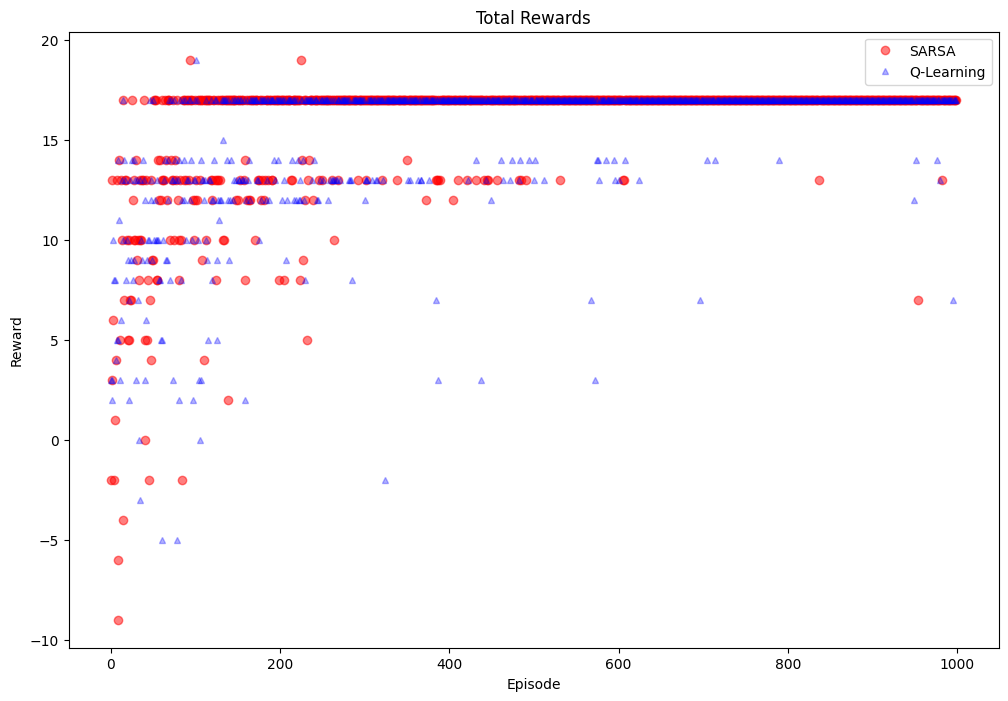

In [ ]:
# Plot rewards
plt.figure(figsize=(12, 8))
plt.plot(SARSA_REWARDS, 'ro', alpha=0.5, markersize=6)
plt.plot(Q_REWARDS, 'b^', alpha=0.3, markersize=4)

# Set plot labels

plt.title('Total Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend(['SARSA', 'Q-Learning'])

# Show plot
plt.show()


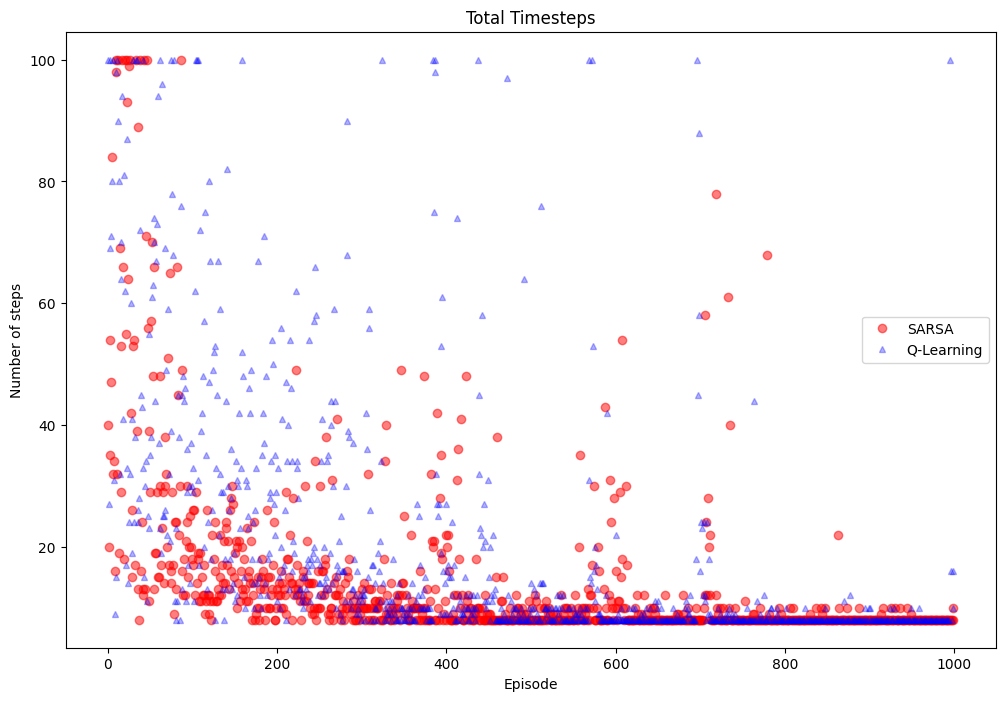

In [ ]:
# Plot timesteps
plt.figure(figsize=(12, 8))
plt.plot(TIMESTEPS_sarsa, 'ro', alpha=0.5, markersize=6)
plt.plot(TIMESTEPS_q, 'b^', alpha=0.3, markersize=4)

# Set plot labels
plt.title('Total Timesteps')
plt.xlabel('Episode')
plt.ylabel('Number of steps')
plt.legend(['SARSA', 'Q-Learning'])

# Show plot
plt.show()


Text(70.72222222222221, 0.5, 'States')

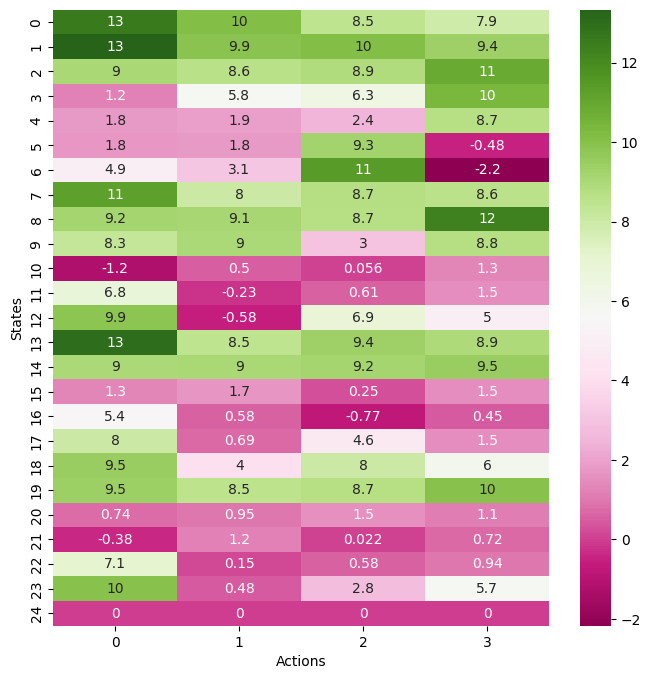

In [ ]:
plt.figure(figsize=(8, 8))
heatmap_Q = sns.heatmap(Q_sarsa, annot=True, cmap='PiYG')
heatmap_Q.set_xlabel('Actions')
heatmap_Q.set_ylabel('States')

Text(70.72222222222221, 0.5, 'States')

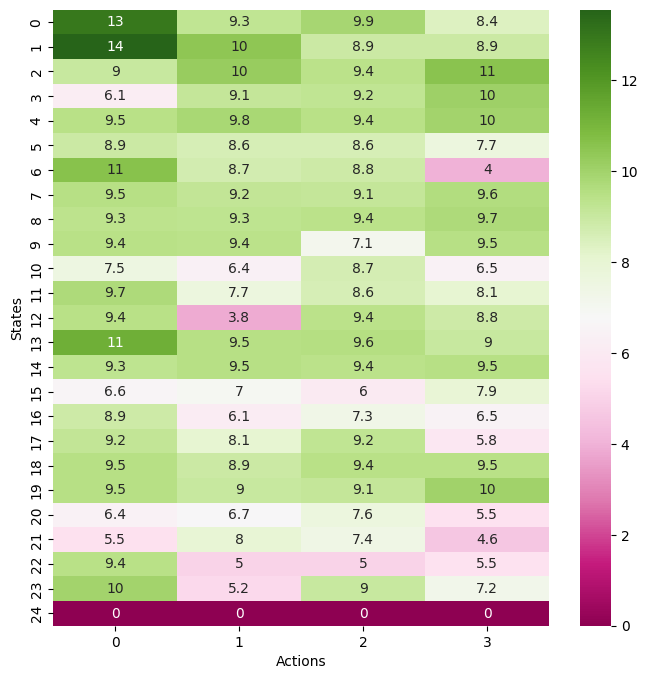

In [ ]:
plt.figure(figsize=(8, 8))
heatmap_Q = sns.heatmap(Q_q, annot=True, cmap='PiYG')
heatmap_Q.set_xlabel('Actions')
heatmap_Q.set_ylabel('States')

## **Bonus Task: 2-step bootstrap SARSA**

In [ ]:
## SARSA function
def SARSA(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon):
    # Q- table
    Q = np.zeros((state_space_size, action_space_size))
    SARSA_REWARDS = []
    EPS=[]
    TIMESTEPS = []
    epsilon = maximum_epsilon
    for episode in range(num_episodes):
        state = env.reset()
        step = 0
        status = False
        total_rewards = 0
        if np.random.uniform(0,1) > epsilon:
            action = np.argmax(Q[state, :])  # Exploit (using gained knowledge about environment)
        else:
            action = env.action_space.sample()  # Explore
        c= 0
        while not status:
            new_state, reward, status = env.step(action)
            if np.random.uniform(0,1) > epsilon:
                new_action = np.argmax(Q[new_state, :])  # Exploit
            else:
                new_action = env.action_space.sample()  # Explore
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[new_state, new_action] - Q[state, action])    # SARSA algorithm Q-value update expression
            total_rewards += reward
            state, action = new_state, new_action
            c+=1
        if epsilon > minimum_epsilon:   # updating the epsilon value
          epsilon = epsilon * epsilon_decay_rate

        SARSA_REWARDS.append(total_rewards)
        EPS.append(epsilon)
        TIMESTEPS.append(c)
    return SARSA_REWARDS, EPS, TIMESTEPS, Q


In [ ]:
def two_step_bootstrap_SARSA(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon):
    # Q- table
    Q = np.zeros((state_space_size, action_space_size))
    SARSA_REWARDS = []
    EPS = []
    TIMESTEPS = []
    epsilon = maximum_epsilon
    for episode in range(num_episodes):
        state = env.reset()
        step = 0
        status = False
        total_rewards = 0
        if np.random.uniform(0,1) > epsilon:
            action = np.argmax(Q[state, :])  # Exploit (using gained knowledge about environment)
        else:
            action = env.action_space.sample()  # Explore
        c = 0
        while not status:
            new_state, reward, status = env.step(action)
            if np.random.uniform(0, 1) > epsilon:
                new_action = np.argmax(Q[new_state, :])  # Exploit
            else:
                new_action = env.action_space.sample()  # Explore

            # Perform 2-step bootstrap SARSA update
            next_state, next_reward, next_status = env.step(new_action)
            if np.random.uniform(0, 1) > epsilon:
                next_action = np.argmax(Q[next_state, :])  # Exploit
            else:
                next_action = env.action_space.sample()  # Explore

            # Calculate the two-step bootstrap target
            target = reward + gamma * (next_reward + gamma * Q[next_state, next_action])

            # Update Q-value using 2-step bootstrap SARSA
            Q[state, action] = Q[state, action] + alpha * (target - Q[state, action])

            total_rewards += reward
            state = new_state
            action = new_action
            c += 1
        
        if epsilon > minimum_epsilon:  # updating the epsilon value
            epsilon = epsilon * epsilon_decay_rate

        SARSA_REWARDS.append(total_rewards)
        EPS.append(epsilon)
        TIMESTEPS.append(c)
    
    return SARSA_REWARDS, EPS, TIMESTEPS, Q


In [ ]:
num_episodes = 1000
alpha = 0.2
gamma = 0.95
maximum_epsilon = 1
minimum_epsilon = 0.01
epsilon_decay_rate = (minimum_epsilon/maximum_epsilon) ** (1/num_episodes)
SARSA_REWARDS, EPS_sarsa, TIMESTEPS_sarsa, Q_sarsa = SARSA(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon)
SARSA2_REWARDS, EPS_sarsa2, TIMESTEPS_sarsa2, Q_sarsa2 = two_step_bootstrap_SARSA(num_episodes, gamma, alpha, epsilon_decay_rate, minimum_epsilon, maximum_epsilon)

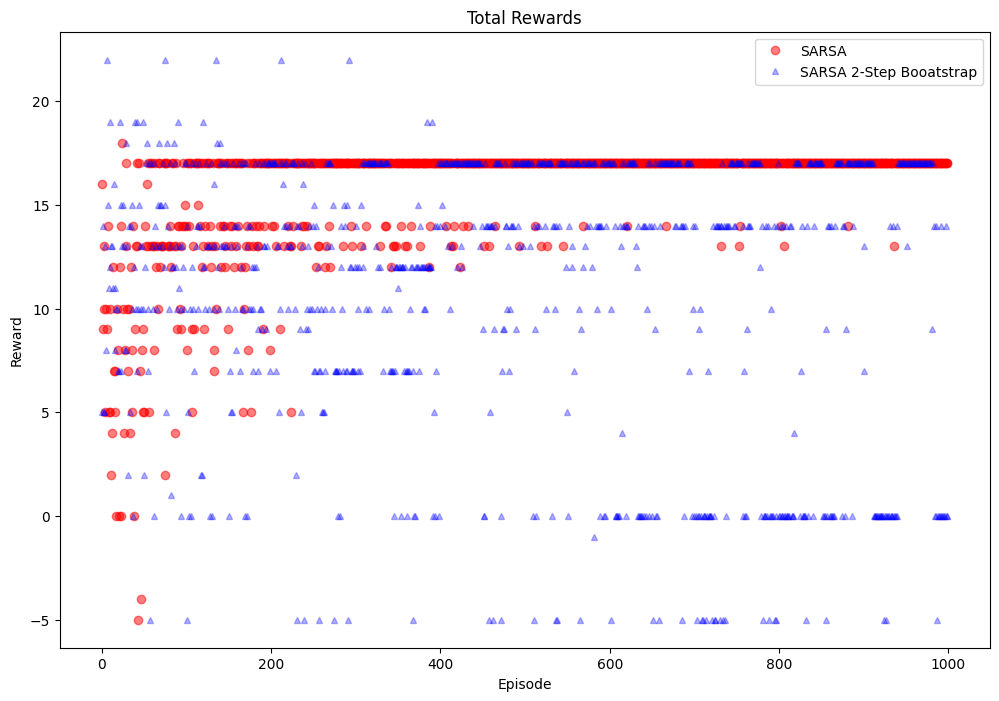

In [ ]:
# Plot cumulative rewards
plt.figure(figsize=(12, 8))
plt.plot(SARSA_REWARDS, 'ro', alpha=0.5, markersize=6)
plt.plot(SARSA2_REWARDS, 'b^', alpha=0.3, markersize=4)

# Set plot labels

plt.title('Total Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend(['SARSA', 'SARSA 2-Step Booatstrap'])

# Show plot
plt.show()



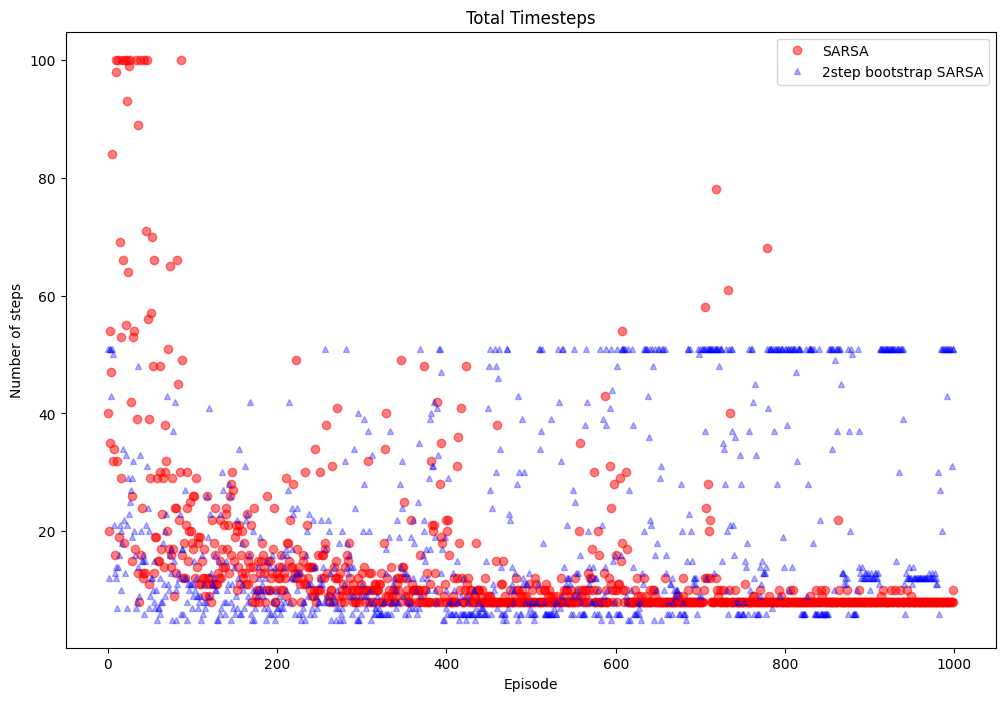

In [ ]:
# Plot timesteps
plt.figure(figsize=(12, 8))
plt.plot(TIMESTEPS_sarsa, 'ro', alpha=0.5, markersize=6)
plt.plot(TIMESTEPS_sarsa2, 'b^', alpha=0.3, markersize=4)

# Set plot labels
plt.title('Total Timesteps')
plt.xlabel('Episode')
plt.ylabel('Number of steps')
plt.legend(['SARSA', '2step bootstrap SARSA'])

# Show plot
plt.show()
